In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("batsmens2222222.xlsx")

In [3]:
df

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against
0,Jonny Bairstow,c Mitchell b Santner,33,35,57,4,1,94.28,England,New Zealand
1,Dawid Malan,c †Latham b Henry,14,24,36,2,0,58.33,England,New Zealand
2,Joe Root,b Phillips,77,86,140,4,1,89.53,England,New Zealand
3,Harry Brook,c Conway b Ravindra,25,16,20,4,1,156.25,England,New Zealand
4,Moeen Ali,b Phillips,11,17,20,1,0,64.70,England,New Zealand
...,...,...,...,...,...,...,...,...,...,...
871,Travis Head,c Shubman Gill b Mohammed Siraj,137,120,166,15,4,114.16,Australia,India
872,Mitchell Marsh,c †Rahul b Bumrah,15,15,15,1,1,100.00,Australia,India
873,Steven Smith,lbw b Bumrah,4,9,11,1,0,44.44,Australia,India
874,Marnus Labuschagne,not out,58,110,133,4,0,52.72,Australia,India


# Cleaning

In [4]:
#handling the incorrect data

df['Batsmen'] = df['Batsmen'].apply(lambda x:x.split("†")[0])
df['Batsmen'] = df['Batsmen'].apply(lambda x:x.replace("(c)",""))

df["R"].replace("-","0",inplace=True)
df["B"].replace("-","0",inplace=True)
df["M"].replace("-","0",inplace=True)
df["4s"].replace("-","0",inplace=True)
df["6s"].replace("-","0",inplace=True)
df["SR"].replace("-","0",inplace=True)

In [5]:
#converting datatype of columns for numeric analysis

df[['R','B','M','4s','6s']] = df[['R','B','M','4s','6s']].astype(int)
df['SR'] = df['SR'].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Batsmen  876 non-null    object 
 1   Out-by   876 non-null    object 
 2   R        876 non-null    int32  
 3   B        876 non-null    int32  
 4   M        876 non-null    int32  
 5   4s       876 non-null    int32  
 6   6s       876 non-null    int32  
 7   SR       876 non-null    float64
 8   Team     876 non-null    object 
 9   Against  876 non-null    object 
dtypes: float64(1), int32(5), object(4)
memory usage: 51.5+ KB


In [7]:
df[df['Batsmen'] == "Virat Kohli"].sum()

Batsmen      0
Out-by       0
R            0
B            0
M            0
4s           0
6s           0
SR         0.0
Team         0
Against      0
dtype: object

In [8]:
#removing unwanted spaces in all string columns

df['Batsmen'] = df['Batsmen'].apply(lambda x: x.strip())
df['Out-by'] = df['Out-by'].apply(lambda x: x.strip())
df['Team'] = df['Team'].apply(lambda x: x.strip())
df['Against'] = df['Against'].apply(lambda x: x.strip())

In [9]:
#creating a new column "Boundary Percentage"

def boundary_percentage(x):
    boundary = 4 * x['4s'] + 6 * x['6s']
    
    if x['R'] == 0:
        return 0  # Avoid division by zero
    
    percentage = (boundary / x['R']) * 100
    return percentage

df['Boundary Percentage'] = df.apply(boundary_percentage, axis=1)

In [10]:
df['Bowled-by'] = df['Out-by'].apply(lambda x:x.split(" b ")[len(x.split(" b "))-1])

# Analysis

In [11]:
#finding all innings score of a batsmen eg.Virat Kohli

virat_data = df[ df['Batsmen'] == "Virat Kohli"]
virat_data

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
84,Virat Kohli,c Labuschagne b Hazlewood,85,116,171,6,0,73.27,India,Australia,28.235294,Hazlewood
158,Virat Kohli,not out,55,56,64,6,0,98.21,India,Afghanistan,43.636364,not out
209,Virat Kohli,c Mohammad Nawaz b Hasan Ali,16,18,31,3,0,88.88,India,Pakistan,75.000000,Hasan Ali
304,Virat Kohli,not out,103,97,113,6,4,106.18,India,Bangladesh,46.601942,not out
380,Virat Kohli,c Phillips b Henry,95,104,154,8,2,91.34,India,New Zealand,46.315789,Henry
520,Virat Kohli,c Stokes b Willey,0,9,12,0,0,0.00,India,England,0.000000,Willey
590,Virat Kohli,c Nissanka b Madushanka,88,94,139,11,0,93.61,India,Sri Lanka,50.000000,Madushanka
659,Virat Kohli,not out,101,121,195,10,0,83.47,India,South Africa,39.603960,not out
807,Virat Kohli,b van der Merwe,51,56,69,5,1,91.07,India,Netherlands,50.980392,b van der Merwe
824,Virat Kohli,c Conway b Southee,117,113,149,9,2,103.53,India,New Zealand,41.025641,Southee


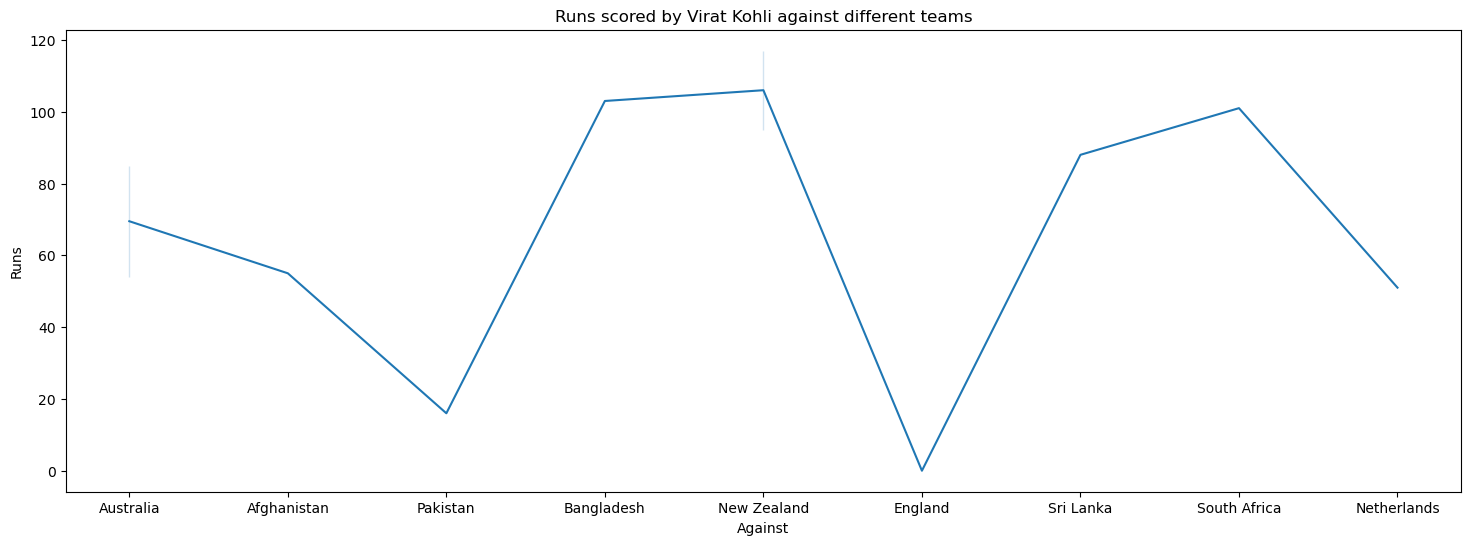

In [12]:
#tracking the performance of a player (Runs) 

plt.figure(figsize=(18,6))
sns.lineplot(data=virat_data, x='Against', y='R')
plt.xlabel('Against')
plt.ylabel('Runs')
plt.title('Runs scored by Virat Kohli against different teams')
plt.show()

In [13]:
rohit = df[ df['Batsmen'] == "Rohit Sharma"]
rohit

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
82,Rohit Sharma,lbw b Hazlewood,0,6,10,0,0,0.00,India,Australia,0.000000,Hazlewood
156,Rohit Sharma,b Rashid Khan,131,84,111,16,5,155.95,India,Afghanistan,71.755725,b Rashid Khan
207,Rohit Sharma,c Iftikhar Ahmed b Shaheen Shah Afridi,86,63,91,6,6,136.50,India,Pakistan,69.767442,Shaheen Shah Afridi
302,Rohit Sharma,c Towhid Hridoy b Hasan Mahmud,48,40,51,7,2,120.00,India,Bangladesh,83.333333,Hasan Mahmud
378,Rohit Sharma,b Ferguson,46,40,44,4,4,115.00,India,New Zealand,86.956522,b Ferguson
518,Rohit Sharma,c Livingstone b Rashid,87,101,162,10,3,86.13,India,England,66.666667,Rashid
588,Rohit Sharma,b Madushanka,4,2,2,1,0,200.00,India,Sri Lanka,100.000000,b Madushanka
657,Rohit Sharma,c Bavuma b Rabada,40,24,32,6,2,166.66,India,South Africa,90.000000,Rabada
805,Rohit Sharma,c Barresi b de Leede,61,54,74,8,2,112.96,India,Netherlands,72.131148,de Leede
822,Rohit Sharma,c Williamson b Southee,47,29,40,4,4,162.06,India,New Zealand,85.106383,Southee


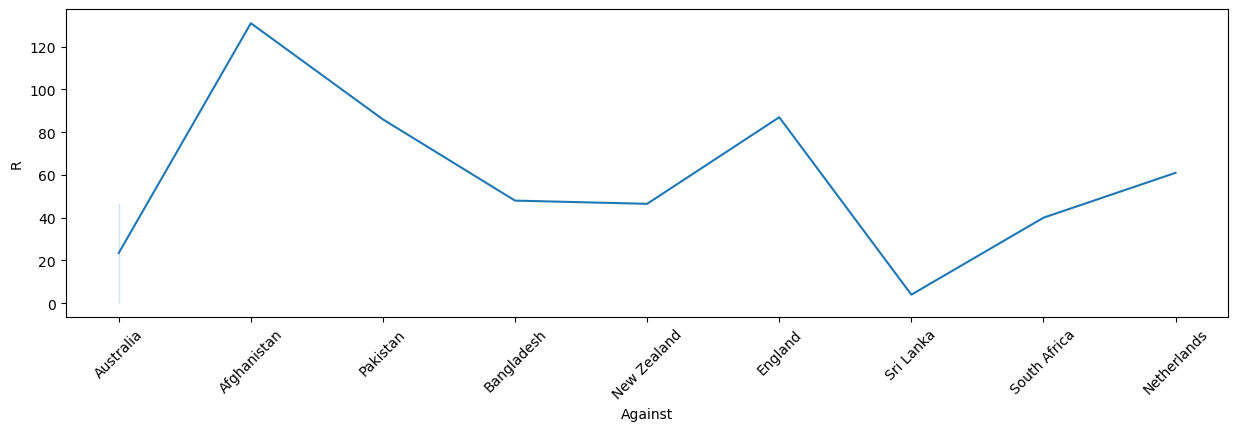

In [14]:
plt.figure(figsize=(15,4))
sns.lineplot(data=rohit,y="R",x="Against",)
plt.xticks(rotation=45)
plt.show()

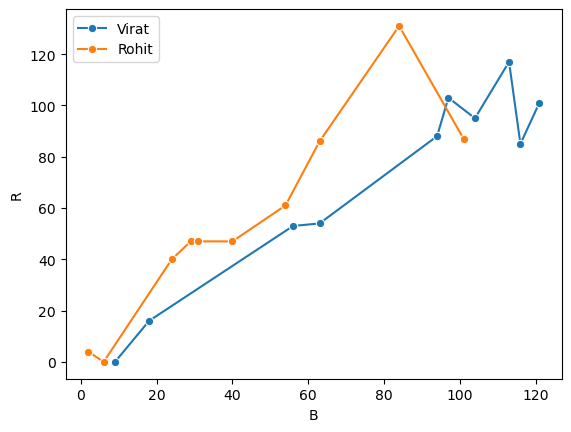

In [15]:
#comparing performance of two players

sns.lineplot(data=virat_data,x="B",y="R",label="Virat",marker="o")
sns.lineplot(data=rohit,x="B",y="R",label="Rohit",marker="o")
plt.show()

**From this we can say that VIRAT Kohli played runner ball games in almost all matches**

In [16]:
#player who scored century in the tournament

centuries = df[df['R']>100]
centuries

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
11,Devon Conway,not out,152,121,147,19,3,125.61,New Zealand,England,61.842105,not out
13,Rachin Ravindra,not out,123,96,141,11,5,128.12,New Zealand,England,60.162602,not out
55,Rassie van der Dussen,c Samarawickrama b Wellalage,108,110,161,13,2,98.18,South Africa,Sri Lanka,59.259259,Wellalage
56,Aiden Markram,c Rajitha b Madushanka,106,54,84,14,3,196.29,South Africa,Sri Lanka,69.811321,Madushanka
109,Dawid Malan,b Mahedi Hasan,140,107,106,16,5,130.84,England,Bangladesh,67.142857,b Mahedi Hasan
132,Kusal Mendis,c Imam-ul-Haq b Hasan Ali,122,77,124,14,6,158.44,Sri Lanka,Pakistan,75.409836,Hasan Ali
133,Sadeera Samarawickrama,c †Mohammad Rizwan b Hasan Ali,108,89,139,11,2,121.34,Sri Lanka,Pakistan,51.851852,Hasan Ali
140,Abdullah Shafique,c sub (MADI Hemantha) b Pathirana,113,103,150,10,3,109.70,Pakistan,Sri Lanka,51.327434,Pathirana
143,Mohammad Rizwan,not out,131,121,193,8,3,108.26,Pakistan,Sri Lanka,38.167939,not out
156,Rohit Sharma,b Rashid Khan,131,84,111,16,5,155.95,India,Afghanistan,71.755725,b Rashid Khan


In [17]:
# no. of centuries per team

centuries.groupby('Team').size().sort_values(ascending=False).reset_index(name='Number of Centuries')

,Team,Number of Centuries
0,Australia,8
1,South Africa,8
2,India,7
3,New Zealand,6
4,Pakistan,3
5,Sri Lanka,3
6,England,2
7,Afghanistan,1
8,Bangladesh,1


**This indicates that there were no centuries scored by the Netherlands.**

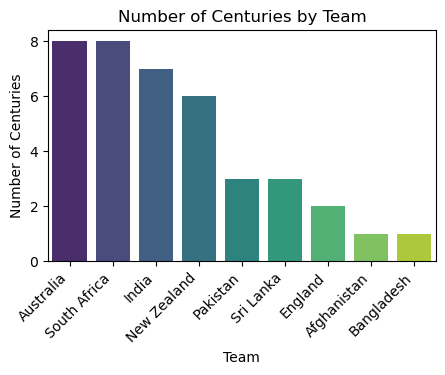

In [18]:
centuries_counts = centuries.groupby('Team').size().sort_values(ascending=False).reset_index(name='Number of Centuries')

plt.figure(figsize=(5, 3))
sns.barplot(x='Team', y='Number of Centuries', data=centuries_counts, palette='viridis')
plt.title('Number of Centuries by Team')
plt.xlabel('Team')
plt.ylabel('Number of Centuries')
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
#teams aginst which most century came

centuries.groupby('Against').size().sort_values(ascending=False).reset_index(name='Number of Centuries')

,Against,Number of Centuries
0,New Zealand,6
1,Bangladesh,5
2,Netherlands,5
3,Pakistan,5
4,Australia,4
5,Sri Lanka,4
6,England,3
7,India,3
8,Afghanistan,2
9,South Africa,2


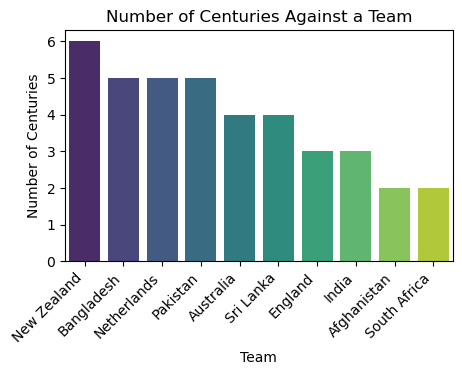

In [20]:
 centuries_counts2 = centuries.groupby('Against').size().sort_values(ascending=False).reset_index(name='Number of Centuries')

plt.figure(figsize=(5, 3))
sns.barplot(x='Against', y='Number of Centuries', data=centuries_counts2, palette='viridis')
plt.title('Number of Centuries Against a Team')
plt.xlabel('Team')
plt.ylabel('Number of Centuries')
plt.xticks(rotation=45, ha='right')
plt.show()

In [21]:
#players who scored centurie and went not-out

centuries[ centuries['Out-by'] == "not out"]

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
11,Devon Conway,not out,152,121,147,19,3,125.61,New Zealand,England,61.842105,not out
13,Rachin Ravindra,not out,123,96,141,11,5,128.12,New Zealand,England,60.162602,not out
143,Mohammad Rizwan,not out,131,121,193,8,3,108.26,Pakistan,Sri Lanka,38.167939,not out
304,Virat Kohli,not out,103,97,113,6,4,106.18,India,Bangladesh,46.601942,not out
633,Fakhar Zaman,not out,126,81,103,8,11,155.55,Pakistan,New Zealand,77.777778,not out
659,Virat Kohli,not out,101,121,195,10,0,83.47,India,South Africa,39.603960,not out
696,Ibrahim Zadran,not out,129,143,217,8,3,90.20,Afghanistan,Australia,38.759690,not out
707,Glenn Maxwell,not out,201,128,181,21,10,157.03,Australia,Afghanistan,71.641791,not out
781,Mitchell Marsh,not out,177,132,177,17,9,134.09,Australia,Bangladesh,68.926554,not out
808,Shreyas Iyer,not out,128,94,145,10,5,136.17,India,Netherlands,54.687500,not out


In [22]:
#player who scored century but at a slow rate i.e took more balls and scored less runs.

centuries[centuries['SR']<100]

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
55,Rassie van der Dussen,c Samarawickrama b Wellalage,108,110,161,13,2,98.18,South Africa,Sri Lanka,59.259259,Wellalage
571,Quinton de Kock,c Phillips b Southee,114,116,176,10,3,98.27,South Africa,New Zealand,50.877193,Southee
659,Virat Kohli,not out,101,121,195,10,0,83.47,India,South Africa,39.603960,not out
696,Ibrahim Zadran,not out,129,143,217,8,3,90.20,Afghanistan,Australia,38.759690,not out
844,David Miller,c Head b Cummins,101,116,138,8,5,87.06,South Africa,Australia,61.386139,Cummins


In [23]:
#finding players who has most boundary percentage i.e. they score most runs though boundar (Power-Hitters)

centuries[ (centuries['R']>100) & (centuries['Boundary Percentage']>70)]

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
132,Kusal Mendis,c Imam-ul-Haq b Hasan Ali,122,77,124,14,6,158.44,Sri Lanka,Pakistan,75.409836,Hasan Ali
156,Rohit Sharma,b Rashid Khan,131,84,111,16,5,155.95,India,Afghanistan,71.755725,b Rashid Khan
308,Mitchell Marsh,c Usama Mir b Shaheen Shah Afridi,121,108,139,10,9,112.03,Australia,Pakistan,77.685950,Shaheen Shah Afridi
421,Glenn Maxwell,c Engelbrecht b van Beek,106,44,53,9,8,240.90,Australia,Netherlands,79.245283,van Beek
475,Travis Head,b Phillips,109,67,94,10,7,162.68,Australia,New Zealand,75.229358,b Phillips
633,Fakhar Zaman,not out,126,81,103,8,11,155.55,Pakistan,New Zealand,77.777778,not out
707,Glenn Maxwell,not out,201,128,181,21,10,157.03,Australia,Afghanistan,71.641791,not out


In [24]:
#finding pwerhitters i.e. player who makes most runs through boundaries and SR > 170

powerhitters = df[(df['Boundary Percentage'] > 75) & (df['SR'] >= 170) & (df['R'] >= 20) ]
powerhitters

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
62,Kusal Mendis,c †Klaasen b Rabada,76,42,55,4,8,180.95,Sri Lanka,South Africa,84.210526,Rabada
261,Aryan Dutt,not out,23,9,14,0,3,255.55,Netherlands,South Africa,78.260870,not out
365,Mark Wood,not out,43,17,25,2,5,252.94,England,South Africa,88.372093,not out
403,David Miller,not out,34,15,26,1,4,226.66,South Africa,Bangladesh,82.352941,not out
421,Glenn Maxwell,c Engelbrecht b van Beek,106,44,53,9,8,240.90,Australia,Netherlands,79.245283,van Beek
464,Quinton de Kock,c Mohammad Wasim b Shaheen Shah Afridi,24,14,19,5,0,171.42,South Africa,Pakistan,83.333333,Shaheen Shah Afridi
479,Glenn Maxwell,c Boult b Neesham,41,24,37,5,2,170.83,Australia,New Zealand,78.048780,Neesham
481,Pat Cummins,lbw b Boult,37,14,23,2,4,264.28,Australia,New Zealand,86.486486,Boult
704,Mitchell Marsh,lbw b Naveen-ul-Haq,24,11,22,2,2,218.18,Australia,Afghanistan,83.333333,Naveen-ul-Haq
734,Kusal Perera,c Santner b Ferguson,51,28,46,9,2,182.14,Sri Lanka,New Zealand,94.117647,Ferguson


In [25]:
# no. of powerhitters per team

powerhitters.groupby(["Team"])[['Batsmen']].size()

Team
Australia       4
England         1
India           1
Netherlands     1
South Africa    2
Sri Lanka       2
dtype: int64

In [26]:
india = df[ df['Team'] == "India"]
india

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
82,Rohit Sharma,lbw b Hazlewood,0,6,10,0,0,0.00,India,Australia,0.000000,Hazlewood
83,Ishan Kishan,c Green b Starc,0,1,3,0,0,0.00,India,Australia,0.000000,Starc
84,Virat Kohli,c Labuschagne b Hazlewood,85,116,171,6,0,73.27,India,Australia,28.235294,Hazlewood
85,Shreyas Iyer,c Warner b Hazlewood,0,3,2,0,0,0.00,India,Australia,0.000000,Hazlewood
86,KL Rahul,not out,97,115,180,8,2,84.34,India,Australia,45.360825,not out
...,...,...,...,...,...,...,...,...,...,...,...,...
865,Suryakumar Yadav,c †Inglis b Hazlewood,18,28,57,1,0,64.28,India,Australia,22.222222,Hazlewood
866,Mohammed Shami,c †Inglis b Starc,6,10,9,1,0,60.00,India,Australia,66.666667,Starc
867,Jasprit Bumrah,lbw b Zampa,1,3,5,0,0,33.33,India,Australia,0.000000,Zampa
868,Kuldeep Yadav,run out (Labuschagne/Cummins),10,18,28,0,0,55.55,India,Australia,0.000000,run out (Labuschagne/Cummins)


In [27]:
teamindia = india.groupby('Batsmen')[["R","B","4s","6s","SR"]].agg({"R":"sum","B":"sum","4s":"sum","6s":"sum","SR":"mean"})
teamindia.sort_values(by="R",ascending=False)

,R,B,4s,6s,SR
Batsmen,,,,,
Virat Kohli,765,847,68,9,83.206364
Rohit Sharma,597,474,66,31,127.897273
Shreyas Iyer,530,468,37,24,96.670909
KL Rahul,452,498,38,9,96.785000
Shubman Gill,354,331,41,12,103.162222
Ravindra Jadeja,120,118,7,3,106.044000
Suryakumar Yadav,106,105,12,1,108.428571
Ishan Kishan,47,48,5,2,50.000000
Kuldeep Yadav,19,31,1,0,62.390000


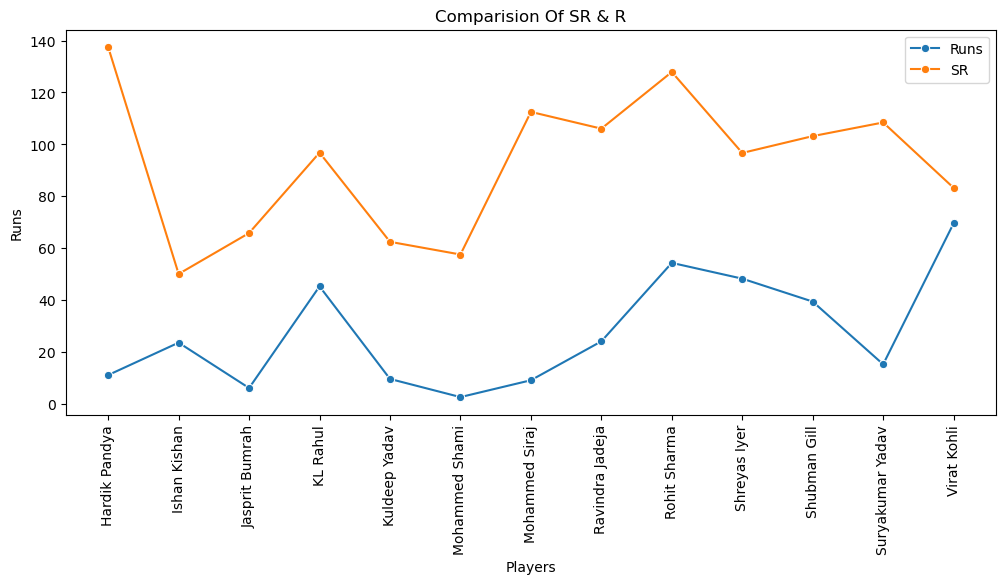

In [28]:
#comparing strike rate and run of each team player.

teamindiaavg = india.groupby('Batsmen')[["R","B","4s","6s","SR"]].agg({"R":"mean","B":"sum","4s":"sum","6s":"sum","SR":"mean"})
plt.figure(figsize=(12, 5))

sns.lineplot(data=teamindiaavg,x=teamindiaavg.index,y='R',label="Runs",marker="o")
sns.lineplot(data=teamindiaavg,x=teamindiaavg.index,y='SR',label="SR",marker="o")
plt.xticks(rotation=90)
plt.title("Comparision Of SR & R")
plt.xlabel("Players")
plt.ylabel("Runs")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x400 with 0 Axes>

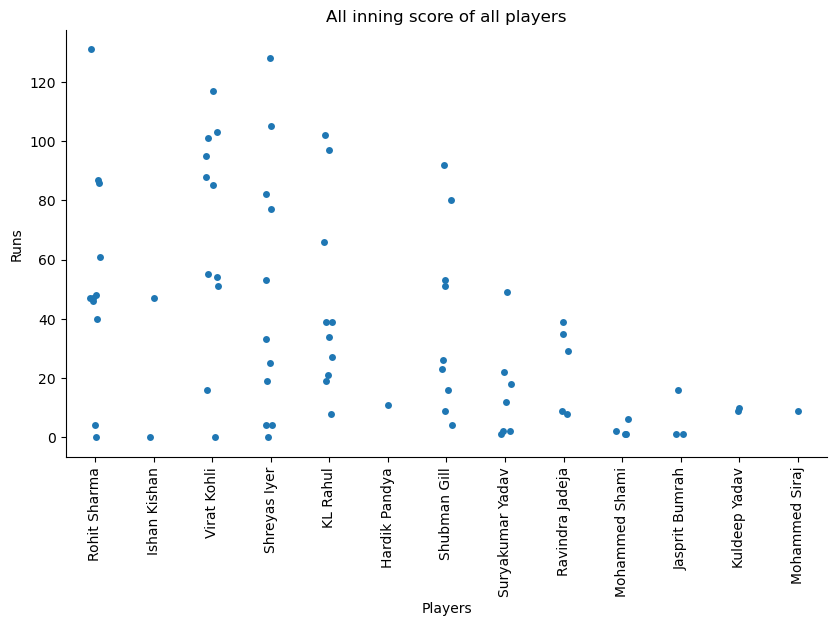

In [29]:
#displaying all the innings of each players

plt.figure(figsize=(20,4))
sns.catplot(data=india,x="Batsmen",y="R",aspect=1.75)
plt.title("All inning score of all players")
plt.ylabel("Runs")
plt.xlabel("Players")
plt.xticks(rotation=90)
plt.show()

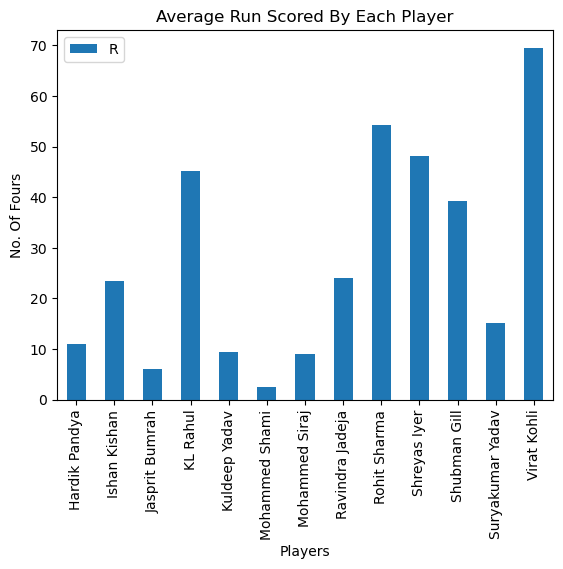

In [30]:
#finding team batting report

india.groupby("Batsmen")[['R']].mean().plot.bar()
plt.title("Average Run Scored By Each Player")
plt.ylabel("No. Of Fours")
plt.xlabel("Players")
plt.show()

**It can be observed that Virat Kohli and Rohit Sharma boast the highest batting averages in the tournament for Team India.**

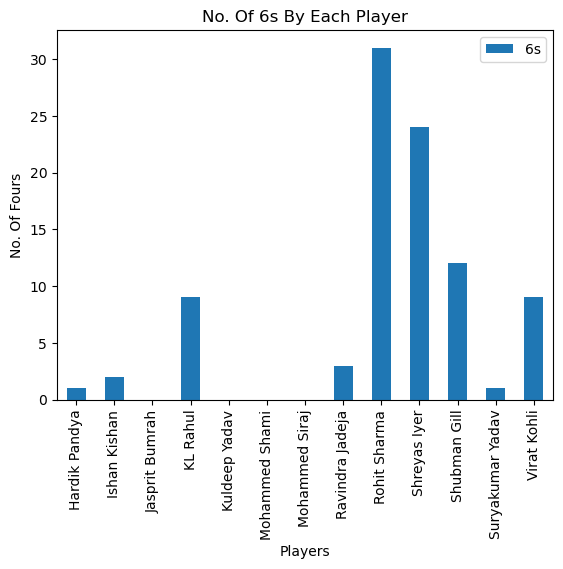

In [31]:
#finding team batting report - 6s

india.groupby("Batsmen")[['6s']].sum().plot.bar()
plt.title("No. Of 6s By Each Player")
plt.ylabel("No. Of Fours")
plt.xlabel("Players")
plt.show()

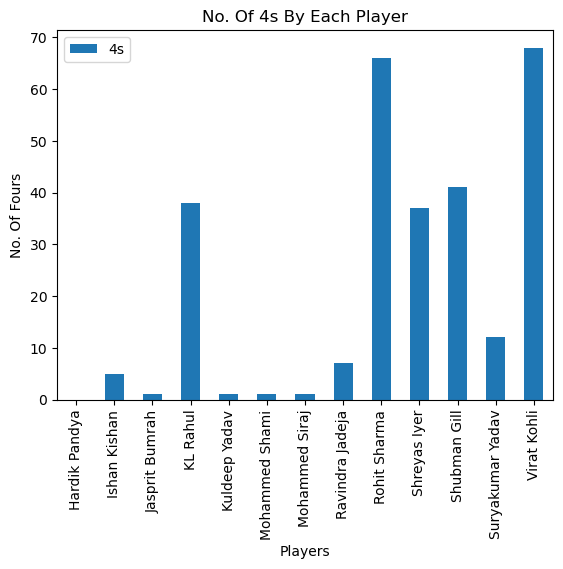

In [32]:
#finding team batting report - 4s

india.groupby("Batsmen")[['4s']].sum().plot.bar()
plt.title("No. Of 4s By Each Player")
plt.ylabel("No. Of Fours")
plt.xlabel("Players")
plt.show()

In [33]:
#finding all the players who got golden duck in the tournament

goldenduck = df[ (df["R"]==0) & (df['B']==1) ]
goldenduck

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
12,Will Young,c †Buttler b Curran,0,1,5,0,0,0.0,New Zealand,England,0.0,Curran
22,Hasan Ali,lbw b de Leede,0,1,2,0,0,0.0,Pakistan,Netherlands,0.0,de Leede
67,Dunith Wellalage,c †Klaasen b Coetzee,0,1,2,0,0,0.0,Sri Lanka,South Africa,0.0,Coetzee
83,Ishan Kishan,c Green b Starc,0,1,3,0,0,0.0,India,Australia,0.0,Starc
113,Liam Livingstone,b Shoriful Islam,0,1,1,0,0,0.0,England,Bangladesh,0.0,b Shoriful Islam
121,Najmul Hossain Shanto,c Livingstone b Topley,0,1,1,0,0,0.0,Bangladesh,England,0.0,Topley
167,Kagiso Rabada,not out,0,1,4,0,0,0.0,South Africa,Australia,0.0,not out
180,Litton Das,c Henry b Boult,0,1,1,0,0,0.0,Bangladesh,New Zealand,0.0,Boult
290,Naveen-ul-Haq,c Chapman b Santner,0,1,1,0,0,0.0,Afghanistan,New Zealand,0.0,Santner
309,Glenn Maxwell,c Babar Azam b Shaheen Shah Afridi,0,1,1,0,0,0.0,Australia,Pakistan,0.0,Shaheen Shah Afridi


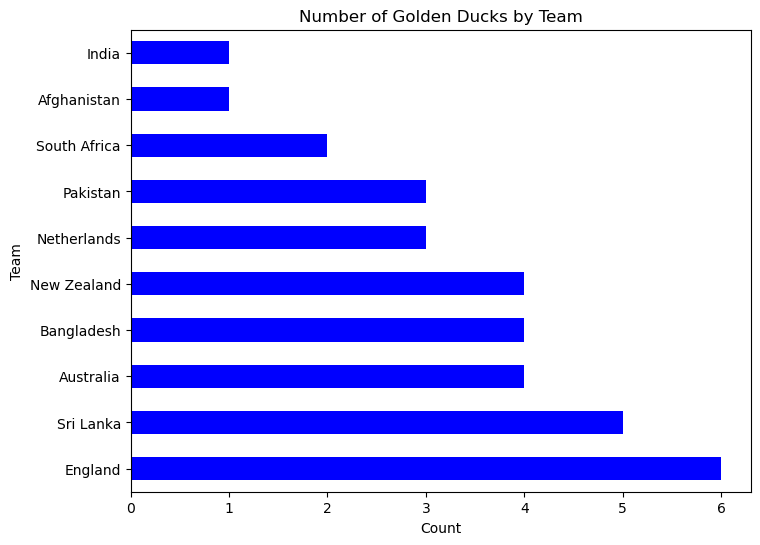

In [34]:
#golden duck per team

gd = goldenduck.groupby("Team")['Batsmen'].size().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
gd.plot(kind='barh', color='blue')
plt.xlabel('Count')
plt.ylabel('Team')
plt.title('Number of Golden Ducks by Team')
plt.show()

In [35]:
#total runs by a team in the tournament

team_run = df.groupby("Team")["R"].sum().sort_values()
team_run

Team
Netherlands     1728
Sri Lanka       1942
Bangladesh      1944
Afghanistan     1990
England         2135
Pakistan        2220
New Zealand     2712
South Africa    2773
Australia       2945
India           3038
Name: R, dtype: int32

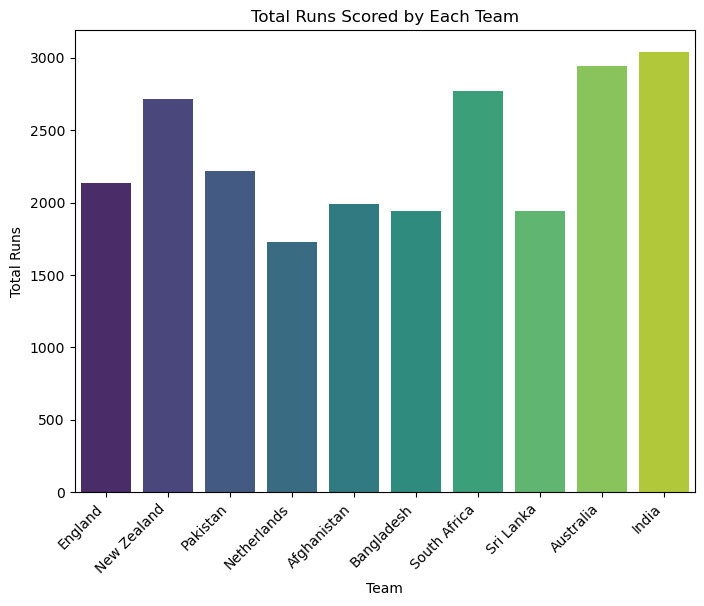

In [36]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Team', y='R', data=df, estimator=sum, palette='viridis',errorbar=None)
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Team')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Runs')
plt.show()

In [37]:
#finding scoreboard of a particular innings and finding batting contributions

inngs_per = df[ (df['Team'] == "India") & (df['Against'] == "England") ][["Batsmen","R","Against"]]
inngs_per

,Batsmen,R,Against
518,Rohit Sharma,87,England
519,Shubman Gill,9,England
520,Virat Kohli,0,England
521,Shreyas Iyer,4,England
522,KL Rahul,39,England
523,Suryakumar Yadav,49,England
524,Ravindra Jadeja,8,England
525,Mohammed Shami,1,England
526,Jasprit Bumrah,16,England
527,Kuldeep Yadav,9,England


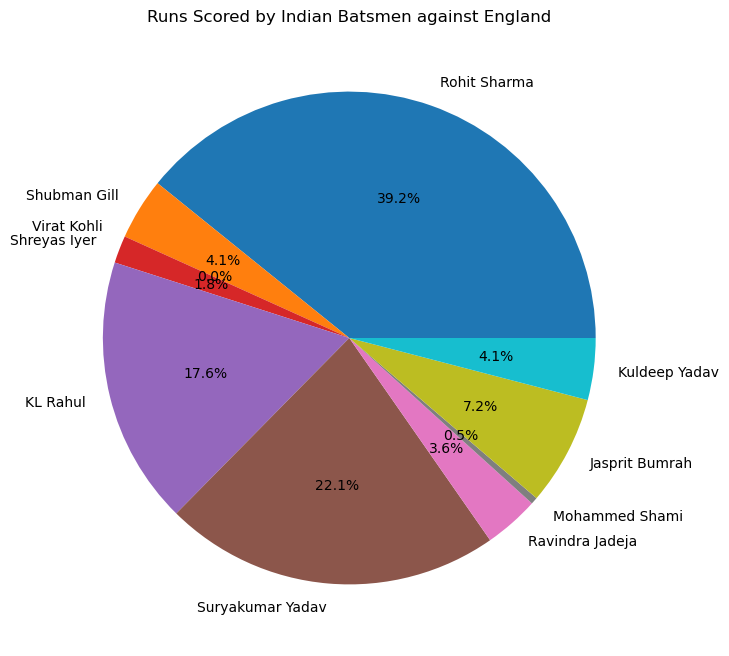

In [38]:
#Determining the batting input of each player in an innings.

plt.figure(figsize=(8, 8))
plt.pie(inngs_per['R'], labels=inngs_per['Batsmen'], autopct='%1.1f%%')
plt.title('Runs Scored by Indian Batsmen against England')
plt.show()

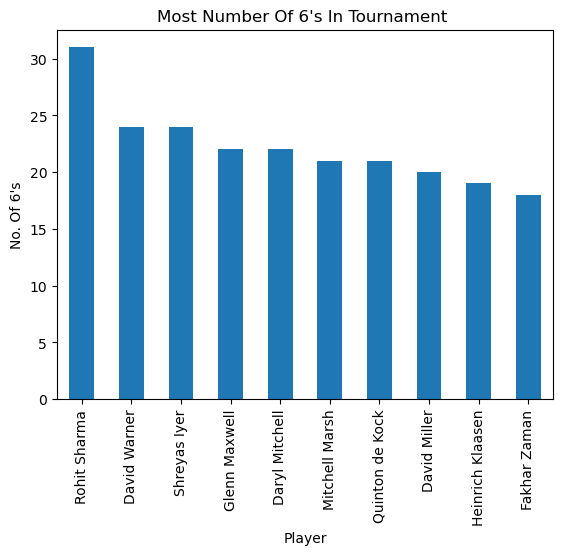

In [39]:
#Identify the top 10 players who have hit the most 6's in the tournament. 

df.groupby('Batsmen')['6s'].sum().sort_values(ascending=False).head(10).plot.bar()
plt.xlabel("Player")
plt.ylabel("No. Of 6's")
plt.title("Most Number Of 6's In Tournament ")
plt.show()

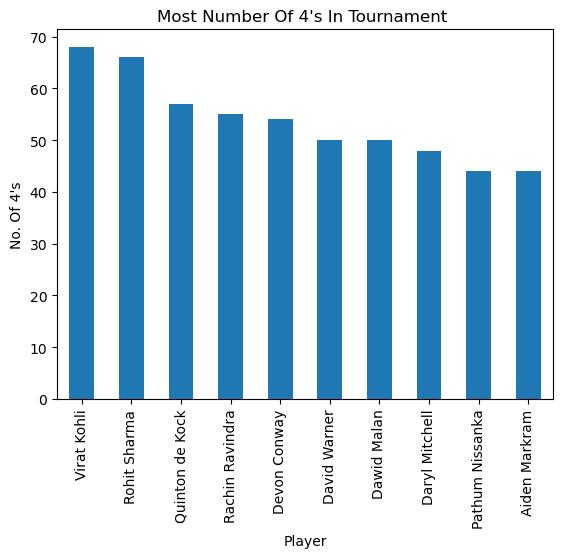

In [40]:
#Identify the top 10 players who have hit the most 4's in the tournament.

df.groupby('Batsmen')['4s'].sum().sort_values(ascending=False).head(10).plot.bar()
plt.xlabel("Player")
plt.ylabel("No. Of 4's")
plt.title("Most Number Of 4's In Tournament ")
plt.show()

In [41]:
#finding player with highest strike rate in the tournament

strike_rate = df[ df['B']>20 ].sort_values(by="SR",ascending=False).head(10)
strike_rate

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
421,Glenn Maxwell,c Engelbrecht b van Beek,106,44,53,9,8,240.90,Australia,Netherlands,79.245283,van Beek
56,Aiden Markram,c Rajitha b Madushanka,106,54,84,14,3,196.29,South Africa,Sri Lanka,69.811321,Madushanka
58,David Miller,not out,39,21,36,3,2,185.71,South Africa,Sri Lanka,61.538462,not out
402,Heinrich Klaasen,c Mahmudullah b Hasan Mahmud,90,49,94,2,8,183.67,South Africa,Bangladesh,62.222222,Hasan Mahmud
734,Kusal Perera,c Santner b Ferguson,51,28,46,9,2,182.14,Sri Lanka,New Zealand,94.117647,Ferguson
62,Kusal Mendis,c †Klaasen b Rabada,76,42,55,4,8,180.95,Sri Lanka,South Africa,84.210526,Rabada
353,Marco Jansen,not out,75,42,72,3,6,178.57,South Africa,England,64.000000,not out
574,David Miller,c Mitchell b Neesham,53,30,48,2,4,176.66,South Africa,New Zealand,60.377358,Neesham
479,Glenn Maxwell,c Boult b Neesham,41,24,37,5,2,170.83,Australia,New Zealand,78.048780,Neesham
364,Gus Atkinson,b Maharaj,35,21,31,7,0,166.66,England,South Africa,80.000000,b Maharaj


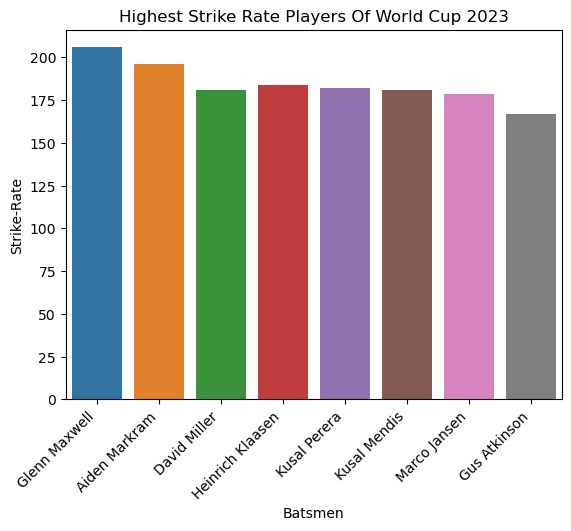

In [42]:
sns.barplot(data=strike_rate,x="Batsmen",y="SR",errorbar=None)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Batsmen")
plt.ylabel("Strike-Rate")
plt.title("Highest Strike Rate Players Of World Cup 2023")
plt.show()

In [43]:
#finding out wickets taken by a particualar bowler

siraj = df[ (df['Bowled-by'] == "b Mohammed Siraj") | (df['Bowled-by'] == "Mohammed Siraj") ][['Batsmen','Team']]
shami = df[ df['Bowled-by'].str.contains("Mohammed Shami") ][['Batsmen','Team']]
bumrah = df[ (df['Bowled-by'] == "b Bumrah") | (df['Bowled-by'] == "Bumrah") ][['Batsmen','Team']]
shami

,Batsmen,Team
368,Will Young,New Zealand
369,Rachin Ravindra,New Zealand
370,Daryl Mitchell,New Zealand
374,Mitchell Santner,New Zealand
375,Matt Henry,New Zealand
528,Jonny Bairstow,England
531,Ben Stokes,England
533,Moeen Ali,England
537,Adil Rashid,England
601,Charith Asalanka,Sri Lanka


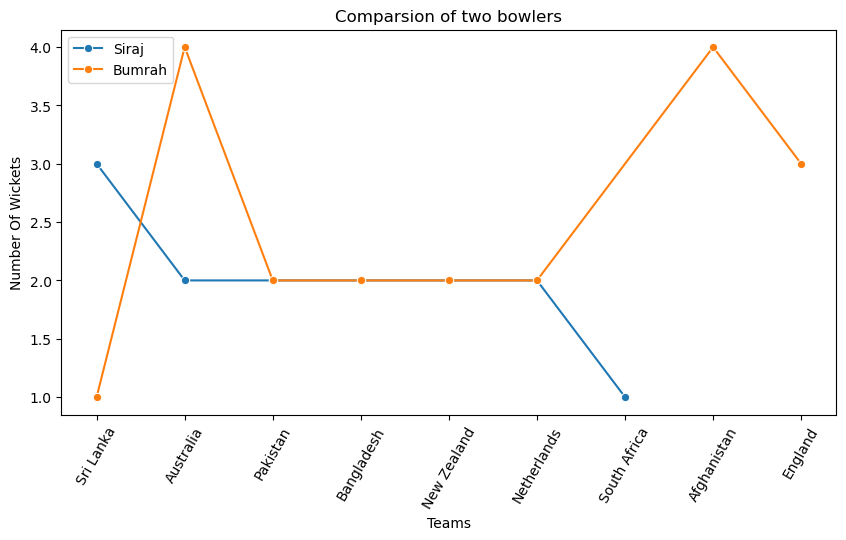

In [44]:
#comparing two bowlers wickets in against all teams in the tournamnet

siraj_w_count= siraj['Team'].value_counts()
bumrah_w_count = bumrah['Team'].value_counts()
#shami_w_count = shami['Team'].value_counts()

plt.figure(figsize=(10,5))
sns.lineplot(x=siraj_w_count.index,y=siraj_w_count.values,marker="o",label="Siraj")
sns.lineplot(x=bumrah_w_count.index,y=bumrah_w_count.values,marker="o",label="Bumrah")
#sns.lineplot(x=shami_w_count.index,y=shami_w_count.values,marker="o",label="Shami")
plt.xticks(rotation=60)
plt.title("Comparsion of two bowlers")
plt.ylabel("Number Of Wickets")
plt.xlabel("Teams")
plt.show()

In [45]:
#finding out player who got run out and then per country

runouts = df[ df['Out-by'].str.contains("run out")]
runout_count = runouts.groupby("Team").size().sort_values(ascending=False)

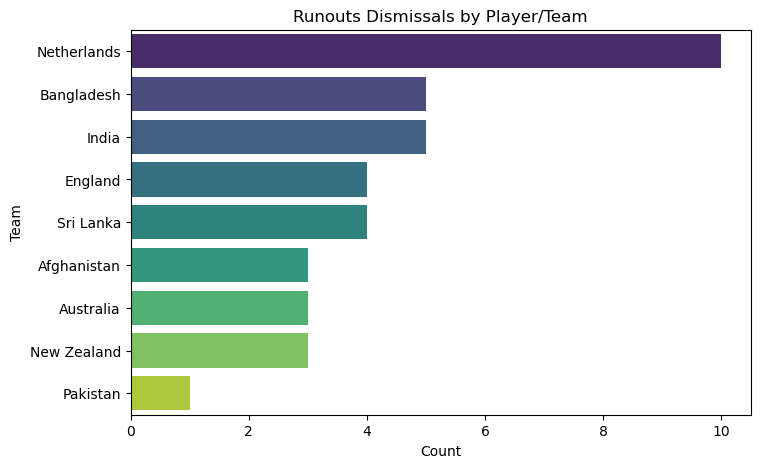

In [46]:
plt.figure(figsize=(8, 5))
sns.barplot(x=runout_count.values, y=runout_count.index, palette="viridis")
plt.xlabel('Count')
plt.ylabel('Team')
plt.title('Runouts Dismissals by Player/Team')
plt.show()

In [47]:
#LBWs player who got lbw and then per country

lbws = df[ df['Out-by'].str.contains("lbw")]
lbw_count = lbws.groupby("Team").size().sort_values(ascending=False)

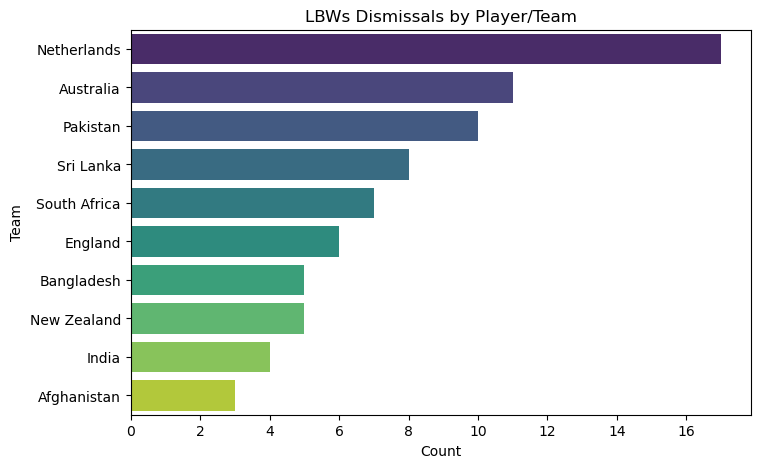

In [48]:
plt.figure(figsize=(8, 5))
sns.barplot(x=lbw_count.values, y=lbw_count.index, palette="viridis")
plt.xlabel('Count')
plt.ylabel('Team')
plt.title('LBWs Dismissals by Player/Team')
plt.show()

In [49]:
df.head()

,Batsmen,Out-by,R,B,M,4s,6s,SR,Team,Against,Boundary Percentage,Bowled-by
0,Jonny Bairstow,c Mitchell b Santner,33,35,57,4,1,94.28,England,New Zealand,66.666667,Santner
1,Dawid Malan,c †Latham b Henry,14,24,36,2,0,58.33,England,New Zealand,57.142857,Henry
2,Joe Root,b Phillips,77,86,140,4,1,89.53,England,New Zealand,28.571429,b Phillips
3,Harry Brook,c Conway b Ravindra,25,16,20,4,1,156.25,England,New Zealand,88.000000,Ravindra
4,Moeen Ali,b Phillips,11,17,20,1,0,64.70,England,New Zealand,36.363636,b Phillips


# Bowling Analysis

In [50]:
df2 = pd.read_excel("bowlers222222.xlsx")

In [51]:
df2

,Bowler,O,M,R,W,Eco,0s,4s,6s,WD,NB,Team,Against
0,Trent Boult,10.0,1,48,1,4.80,34,3,2,1,0,New Zealand,England
1,Matt Henry,10.0,1,48,3,4.80,31,6,0,0,0,New Zealand,England
2,Mitchell Santner,10.0,0,37,2,3.70,26,0,0,1,0,New Zealand,England
3,James Neesham,7.0,0,56,0,8.00,15,5,2,2,0,New Zealand,England
4,Rachin Ravindra,10.0,0,76,1,7.60,14,6,2,0,0,New Zealand,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,Jasprit Bumrah,9.0,2,43,2,4.77,37,8,0,0,0,India,Australia
570,Mohammed Shami,7.0,1,47,1,6.71,28,6,1,3,0,India,Australia
571,Ravindra Jadeja,10.0,0,43,0,4.30,29,1,1,1,0,India,Australia
572,Kuldeep Yadav,10.0,0,56,0,5.60,25,3,2,0,0,India,Australia


In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Bowler   574 non-null    object 
 1   O        574 non-null    float64
 2   M        574 non-null    int64  
 3   R        574 non-null    int64  
 4   W        574 non-null    int64  
 5   Eco      574 non-null    float64
 6   0s       574 non-null    int64  
 7   4s       574 non-null    int64  
 8   6s       574 non-null    int64  
 9   WD       574 non-null    int64  
 10  NB       574 non-null    int64  
 11  Team     574 non-null    object 
 12  Against  574 non-null    object 
dtypes: float64(2), int64(8), object(3)
memory usage: 58.4+ KB


In [53]:
#bowlers who bowled most no-balls in the tournament

no_ball = df2.groupby("Bowler")[["NB"]].sum().sort_values(by="NB",ascending=False)[:11]
no_ball

,NB
Bowler,
Kagiso Rabada,5
Marco Jansen,5
Matt Henry,3
Paul van Meekeren,3
Dilshan Madushanka,3
Tabraiz Shamsi,3
Hasan Mahmud,2
Naveen-ul-Haq,2
Hasan Ali,2


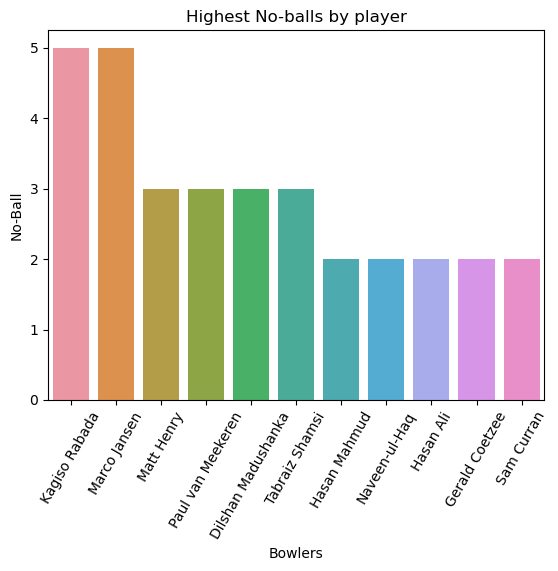

In [54]:
sns.barplot(data=no_ball,x=no_ball.index, y="NB")
plt.xticks(rotation=60)
plt.title("Highest No-balls by player")
plt.xlabel("Bowlers")
plt.ylabel("No-Ball")
plt.show()

In [55]:
#Highest Run Conceded by a bowler in a match

most_runs_in_an_over = df2[ df2['O'] ==10 ].sort_values(by="R",ascending=False)[:11]
most_runs_in_an_over

,Bowler,O,M,R,W,Eco,0s,4s,6s,WD,NB,Team,Against
283,Bas de Leede,10.0,0,115,2,11.5,20,13,6,1,1,Netherlands,Australia
525,Logan van Beek,10.0,0,107,0,10.7,17,10,6,1,0,Netherlands,India
540,Tim Southee,10.0,0,100,3,10.0,20,8,6,1,0,New Zealand,India
42,Matheesha Pathirana,10.0,0,95,1,9.5,22,10,2,5,0,Sri Lanka,South Africa
45,Marco Jansen,10.0,0,92,2,9.2,31,10,6,3,0,South Africa,Sri Lanka
407,Shaheen Shah Afridi,10.0,0,90,0,9.0,24,11,2,5,0,Pakistan,New Zealand
38,Kasun Rajitha,10.0,1,90,1,9.0,24,8,5,2,0,Sri Lanka,South Africa
527,Paul van Meekeren,10.0,0,90,1,9.0,19,6,5,2,1,Netherlands,India
467,Logan van Beek,10.0,0,88,2,8.8,25,10,1,10,0,Netherlands,England
39,Dilshan Madushanka,10.0,0,86,2,8.6,25,12,1,3,1,Sri Lanka,South Africa


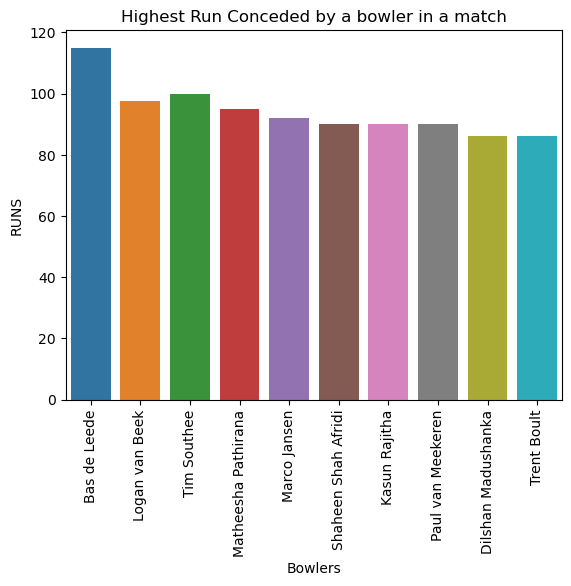

In [56]:
sns.barplot(data=most_runs_in_an_over, x="Bowler", y="R",errorbar=None)
plt.xticks(rotation=90)
plt.title("Highest Run Conceded by a bowler in a match")
plt.xlabel("Bowlers")
plt.ylabel("RUNS")
plt.show()

In [57]:
#Least Run Conceded by a bowler in a match

least_runs_in_an_over = df2[ df2['O'] ==10 ].sort_values(by="R",ascending=True)[:11]
least_runs_in_an_over

,Bowler,O,M,R,W,Eco,0s,4s,6s,WD,NB,Team,Against
428,Adam Zampa,10.0,0,21,3,2.1,41,0,0,2,0,Australia,England
480,Mitchell Santner,10.0,2,22,2,2.2,45,2,0,0,0,New Zealand,Sri Lanka
561,Keshav Maharaj,10.0,0,24,1,2.4,39,1,0,0,0,South Africa,Australia
492,Keshav Maharaj,10.0,1,25,2,2.5,41,0,0,2,0,South Africa,Afghanistan
332,Aryan Dutt,10.0,3,26,1,2.6,48,3,1,0,0,Netherlands,Bangladesh
54,Ravindra Jadeja,10.0,2,28,3,2.8,38,2,0,0,0,India,Australia
83,Mark Wood,10.0,0,29,1,2.9,38,2,0,1,0,England,Bangladesh
121,Keshav Maharaj,10.0,0,30,2,3.0,40,2,0,2,0,South Africa,Australia
434,Keshav Maharaj,10.0,0,30,1,3.0,32,0,0,1,0,South Africa,India
399,Rashid Khan,10.0,0,31,0,3.1,35,0,0,3,0,Afghanistan,Netherlands


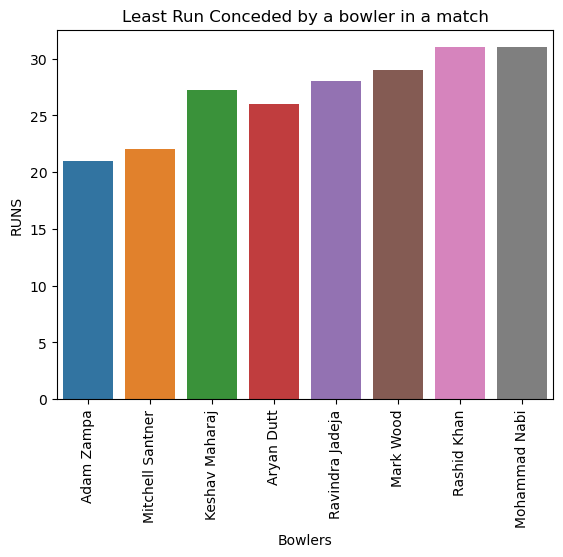

In [58]:
sns.barplot(data=least_runs_in_an_over, x="Bowler", y="R",errorbar=None)
plt.xticks(rotation=90)
plt.title("Least Run Conceded by a bowler in a match")
plt.xlabel("Bowlers")
plt.ylabel("RUNS")
plt.show()

In [59]:
df2.head()

,Bowler,O,M,R,W,Eco,0s,4s,6s,WD,NB,Team,Against
0,Trent Boult,10.0,1,48,1,4.8,34,3,2,1,0,New Zealand,England
1,Matt Henry,10.0,1,48,3,4.8,31,6,0,0,0,New Zealand,England
2,Mitchell Santner,10.0,0,37,2,3.7,26,0,0,1,0,New Zealand,England
3,James Neesham,7.0,0,56,0,8.0,15,5,2,2,0,New Zealand,England
4,Rachin Ravindra,10.0,0,76,1,7.6,14,6,2,0,0,New Zealand,England


In [226]:
#best economy in whole tournaments i.e. who gave least runs in an over

economy = df2.groupby("Bowler")[["O","Eco"]].agg({"O":"sum","Eco":"mean"})
besteco = economy[ economy['O']>45].sort_values(by="Eco")[0:11]
besteco

,O,Eco
Bowler,,
Jasprit Bumrah,91.5,3.874545
Kuldeep Yadav,95.1,4.077273
Ravindra Jadeja,92.9,4.362727
Rashid Khan,86.3,4.548889
Josh Hazlewood,93.1,4.741818
Mohammad Nabi,61.3,4.868889
Keshav Maharaj,89.0,4.935000
Mitchell Santner,92.4,4.958000
Glenn Maxwell,68.3,5.041250


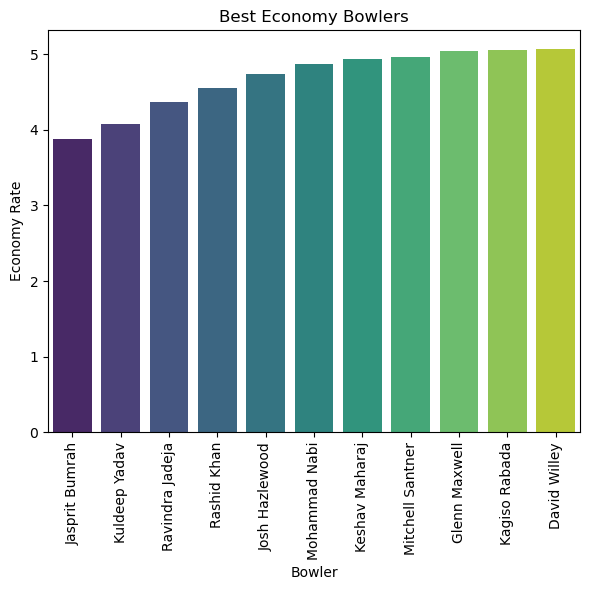

In [227]:
#sns.lineplot(data=best_eco,x=best_eco.index,y="Eco")

plt.figure(figsize=(6, 6))
sns.barplot(x=besteco.index, y='Eco', data=besteco, palette='viridis')
plt.title('Best Economy Bowlers')
plt.xlabel('Bowler')
plt.ylabel('Economy Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [229]:
#worst economy in whole tournaments i.e. who gave least runs in an over

worsteco = economy[ economy['O']>45].sort_values(by="Eco",ascending=False)[0:11]
worsteco

,O,Eco
Bowler,,
Bas de Leede,67.0,7.263750
Kasun Rajitha,49.0,7.243333
Mark Wood,54.0,6.880000
Dilshan Madushanka,77.8,6.786667
Haris Rauf,79.0,6.768889
Naveen-ul-Haq,53.0,6.608750
Marco Jansen,68.6,6.508889
Logan van Beek,70.5,6.500000
Gerald Coetzee,63.3,6.442500


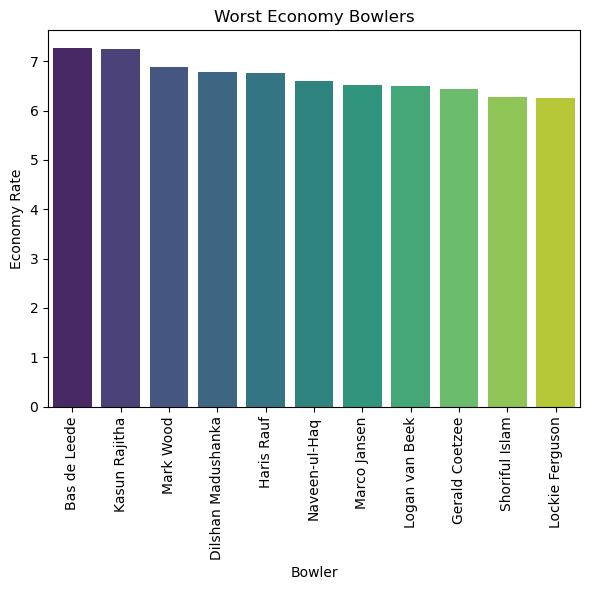

In [230]:
#sns.lineplot(data=best_eco,x=best_eco.index,y="Eco")

plt.figure(figsize=(6, 6))
sns.barplot(x=worsteco.index, y='Eco', data=worsteco, palette='viridis')
plt.title('Worst Economy Bowlers')
plt.xlabel('Bowler')
plt.ylabel('Economy Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [64]:
#most wickets by a bowler

wickets = df2.groupby("Bowler")[['W']].sum().sort_values(by="W",ascending=False)[:11]
wickets

,W
Bowler,
Mohammed Shami,24
Adam Zampa,23
Dilshan Madushanka,21
Jasprit Bumrah,20
Gerald Coetzee,20
Shaheen Shah Afridi,18
Marco Jansen,17
Josh Hazlewood,16
Mitchell Starc,16


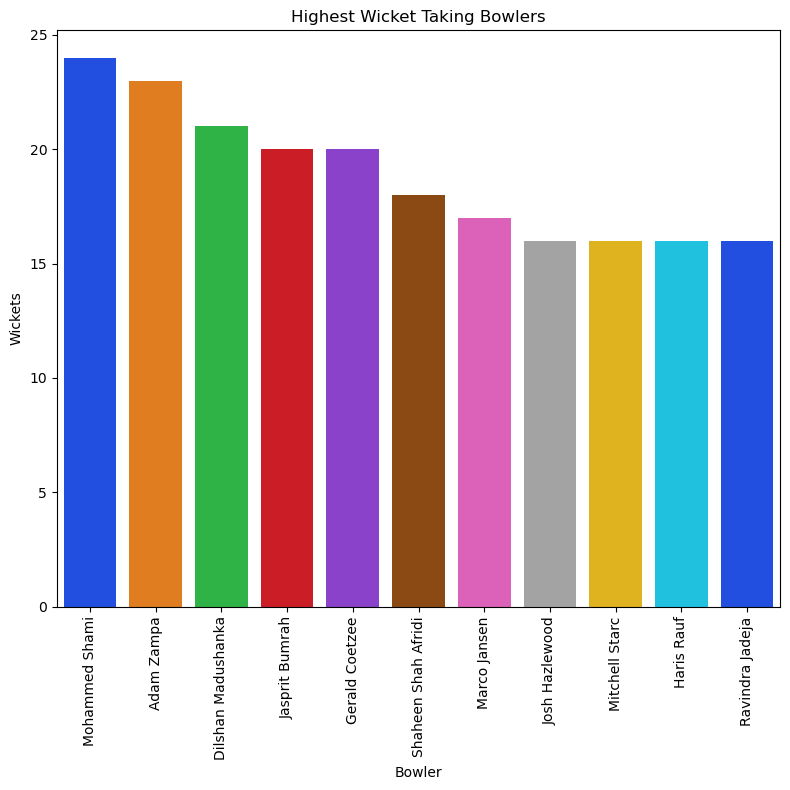

In [65]:
plt.figure(figsize=(8,8))
sns.barplot(data=wickets,x=wickets.index,y="W",palette="bright")
plt.title('Highest Wicket Taking Bowlers')
plt.xlabel('Bowler')
plt.ylabel('Wickets')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [92]:
#number of wickets and runs taken and given by each team

teamwickets = df2.groupby("Team")[['W','R']].sum()
teamwickets

,W,R
Team,,
Afghanistan,53,2144
Australia,86,2749
Bangladesh,51,2414
England,65,2261
India,99,2220
Netherlands,62,2527
New Zealand,71,2664
Pakistan,65,2566
South Africa,88,2324


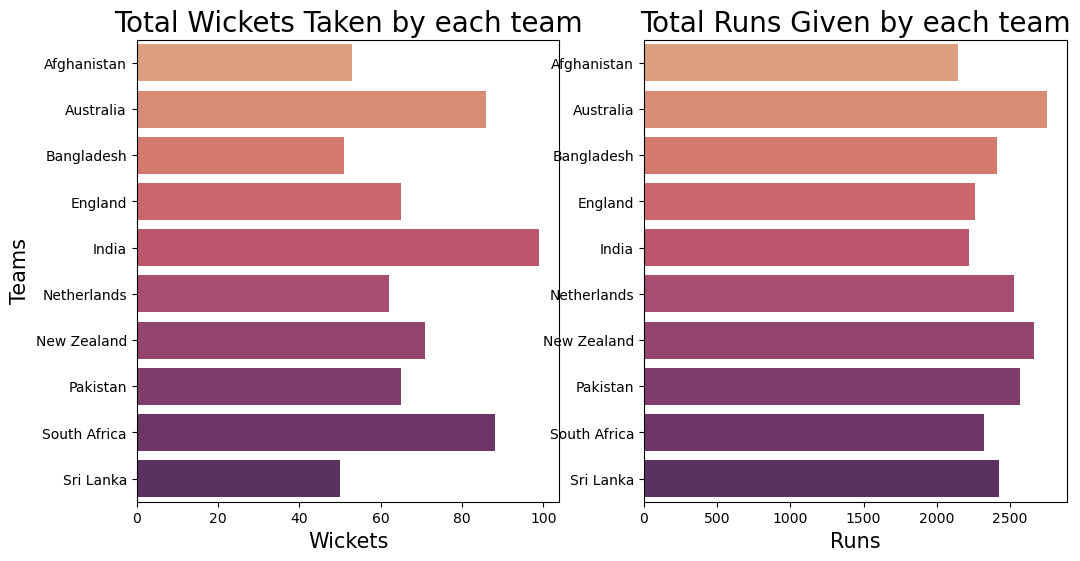

In [105]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(data=teamwickets, y=teamwickets.index, x="W", palette="flare", ax=axes[0])
axes[0].set_xlabel("Wickets", fontsize=15)
axes[0].set_ylabel("Teams", fontsize=15)
axes[0].set_title("Total Wickets Taken by each team", fontsize=20)

sns.barplot(data=teamwickets, y=teamwickets.index, x="R", palette="flare", ax=axes[1])
axes[1].set_xlabel("Runs", fontsize=15)
axes[1].set_ylabel("")  # No need for y-label, they are shared
axes[1].set_title("Total Runs Given by each team", fontsize=20)

plt.show()


In [323]:
#number of wickets each teams lost in the whole tournament

teamwicketslost = df2.groupby("Against")[['W','R']].sum()
teamwicketslost

,W,R
Against,,
Afghanistan,58,2075
Australia,79,3044
Bangladesh,71,2015
England,81,2211
India,53,3128
Netherlands,78,1825
New Zealand,63,2817
Pakistan,64,2305
South Africa,72,2863


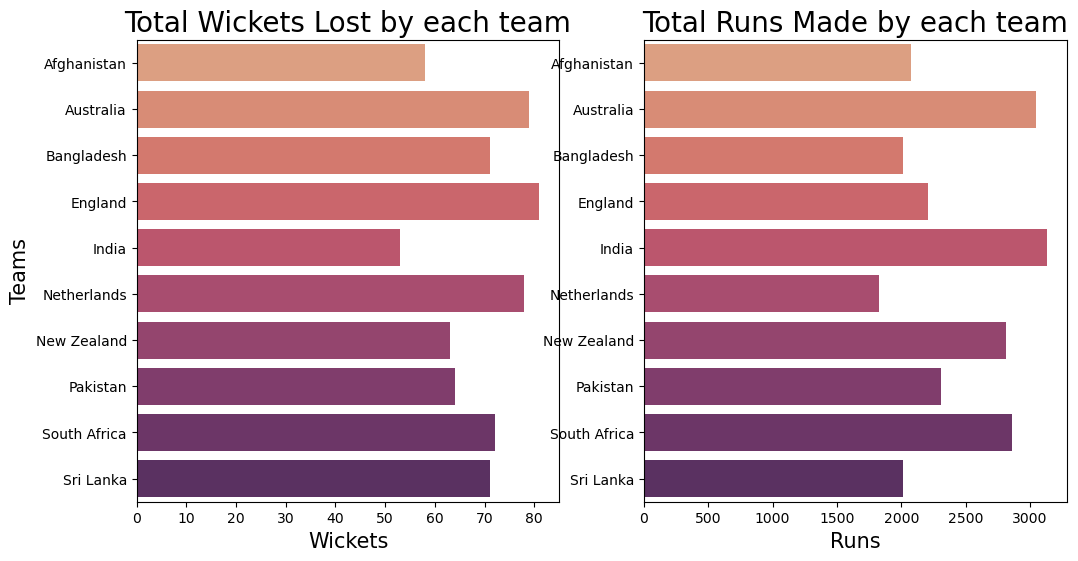

In [324]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(data=teamwicketslost, y=teamwicketslost.index, x="W", palette="flare", ax=axes[0])
axes[0].set_xlabel("Wickets", fontsize=15)
axes[0].set_ylabel("Teams", fontsize=15)
axes[0].set_title("Total Wickets Lost by each team", fontsize=20)

sns.barplot(data=teamwicketslost, y=teamwicketslost.index, x="R", palette="flare", ax=axes[1])
axes[1].set_xlabel("Runs", fontsize=15)
axes[1].set_ylabel("")  # No need for y-label, they are shared
axes[1].set_title("Total Runs Made by each team", fontsize=20)

plt.show()


In [146]:
#finding team wise bowling performances of bowlers

all_bowlers = df2.groupby(["Team","Bowler"])[['R','W','M','4s','6s','WD','NB']].sum()
all_bowlers

R   W  M  4s  6s  WD  NB
Team         Bowler                                           
Afghanistan  Azmatullah Omarzai     270   7  1  29   9   6   1
             Fazalhaq Farooqi       228   6  2  30   5   9   0
             Mohammad Nabi          254   8  4  16   7   3   0
             Mujeeb Ur Rahman       458   8  2  38  13   9   0
             Naveen-ul-Haq          352   8  1  34  11   8   2
             Noor Ahmad             182   5  1  11   3  11   1
             Rahmat Shah             12   0  0   1   1   0   0
             Rashid Khan            388  11  2  25   4  12   0
Australia    Adam Zampa             515  23  1  33  14   9   0
             Cameron Green           11   0  0   2   0   0   0
             Glenn Maxwell          330   6  1  22   5   3   1
             Josh Hazlewood         449  16  8  49   8  13   0
             Marcus Stoinis         143   4  0  14   2   5   0
             Mitchell Marsh          96   2  0   9   3   6   1
             Mitchell Starc         528  16  2  49  13  41   0
             Pat Cummins            515  15  1  49  12  14   1
             Sean Abbott             61   2  0   4   2   0   1
             Travis Head            101   2  0   6   3   1   0
Bangladesh   Hasan Mahmud           132   3  0   8   9   2   2
             Mahedi Hasan           149   6  0  16   2   2   0
             Mahmudullah             33   0  0   2   1   1   0
             Mehidy Hasan Miraz     402  10  3  30  11   5   0
             Mustafizur Rahman      398   5  3  43   8   8   0
             Najmul Hossain Shanto    5   0  0   1   0   0   0
             Nasum Ahmed            172   0  0  14   8   1   0
             Shakib Al Hasan        329   9  1  20  11   2   0
             Shoriful Islam         409  10  3  48   9  11   0
             Tanzim Hasan Sakib      80   3  0   8   4   2   0
             Taskin Ahmed           305   5  3  32   8   9   0
England      Adil Rashid            413  15  1  24  11   3   0
             Chris Woakes           298  10  1  36   4   7   0
             David Willey           259  11  6  30   5   7   1
             Gus Atkinson           146   4  0  13   7   4   0
             Joe Root                67   1  0   4   3   0   0
             Liam Livingstone       158   3  1  14   2   0   0
             Mark Wood              349   6  1  39   7   8   0
             Moeen Ali              248   5  0  18   6   0   0
             Reece Topley           183   8  2  18   6   7   1
             Sam Curran             140   2  2  16   3   4   2
India        Hardik Pandya          113   5  0  19   1   2   0
             Jasprit Bumrah         373  20  9  38   6  22   0
             Kuldeep Yadav          424  15  2  21  14   4   0
             Mohammed Shami         257  24  4  27   7   9   0
             Mohammed Siraj         469  14  6  58   8  17   0
             Ravichandran Ashwin     34   1  1   2   0   0   0
             Ravindra Jadeja        398  16  4  25   9   2   2
             Rohit Sharma             7   1  0   0   1   0   0
             Shardul Thakur         102   2  0   7   4   1   1
             Shubman Gill            11   0  0   1   0   0   0
             Suryakumar Yadav        17   0  0   0   2   0   0
             Virat Kohli             15   1  0   1   0   0   0
Netherlands  Aryan Dutt             426  10  6  46  10  10   1
             Bas de Leede           487  16  0  52  14  18   2
             Colin Ackermann        234   5  2  12   8   2   0
             Logan van Beek         476  12  1  50  14  24   1
             Paul van Meekeren      447  12  1  46   9  17   3
             Roelof van der Merwe   311   6  0  20   8   2   1
             Ryan Klein              41   0  1   7   0   1   0
             Saqib Zulfiqar          40   1  0   6   0   0   1
             Shariz Ahmad            13   0  0   2   0   0   0
             Vikramjit Singh         52   0  0   7   1   1   0
New Zealand  Daryl Mitchell          12   0  0   0   1   0   0
      

In [147]:
pd.set_option("display.max_rows", None)

In [129]:
#comparing performance of each bowler of a team in the tournamnet

indian_bowlers = df2[ df2['Team']=="India" ].groupby("Bowler")[['O','R','W','M','4s','6s','WD','NB']].sum()
indbowler = indian_bowlers[ (indian_bowlers['O']>10 ) ].sort_values(by="W",ascending=False)
indbowler

,O,R,W,M,4s,6s,WD,NB
Bowler,,,,,,,,
Mohammed Shami,48.5,257,24,4,27,7,9,0
Jasprit Bumrah,91.5,373,20,9,38,6,22,0
Ravindra Jadeja,92.9,398,16,4,25,9,2,2
Kuldeep Yadav,95.1,424,15,2,21,14,4,0
Mohammed Siraj,82.3,469,14,6,58,8,17,0
Hardik Pandya,16.3,113,5,0,19,1,2,0
Shardul Thakur,17.0,102,2,0,7,4,1,1


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


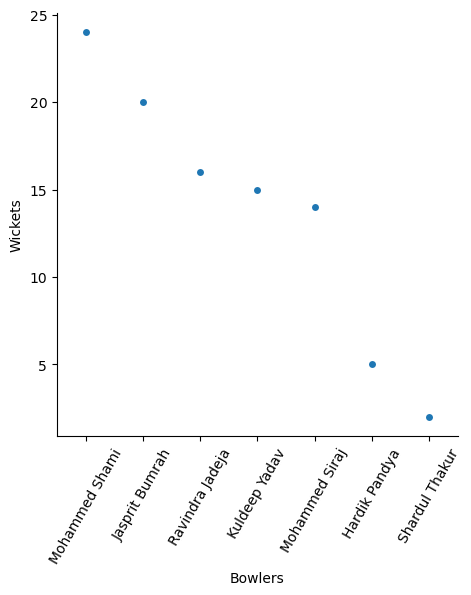

In [152]:
sns.catplot(data=indbowler,x=indbowler.index,y="W")
plt.xticks(rotation=60)
plt.xlabel("Bowlers")
plt.ylabel("Wickets")
plt.show()

In [174]:
indbow = df2[ df2['Team'] == "India"]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


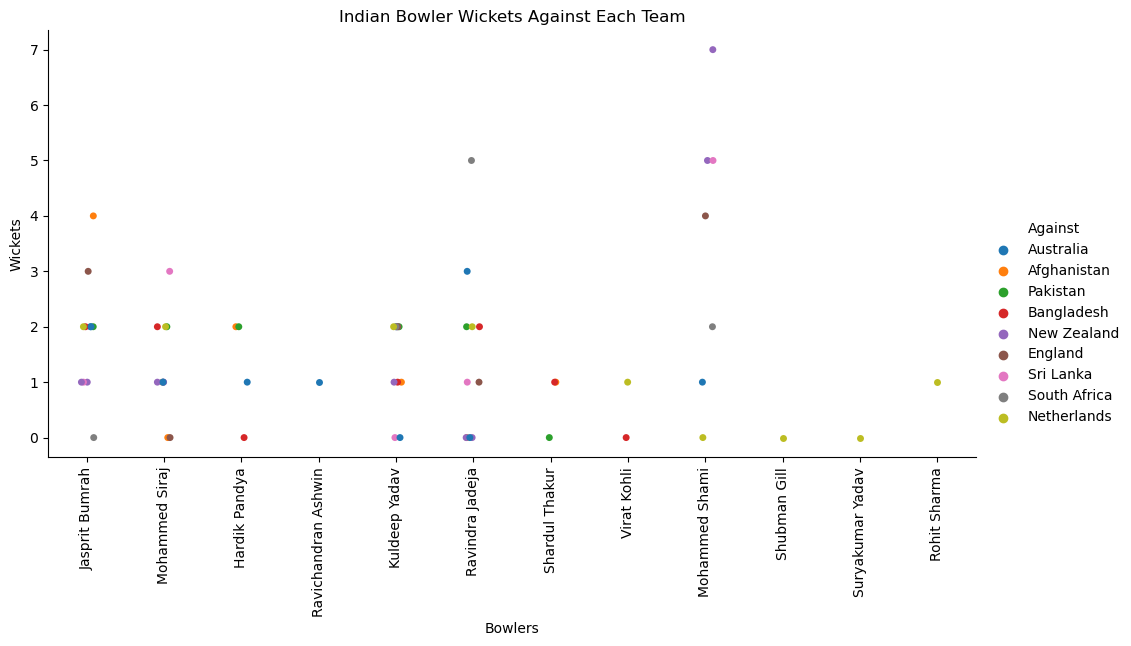

In [208]:
#finding Indian Bowler Wickets Against Each Team

sns.catplot(data=indbow,x="Bowler",y="W",hue="Against",aspect=2)
plt.xticks(rotation=90)
plt.title("Indian Bowler Wickets Against Each Team")
plt.xlabel("Bowlers")
plt.ylabel("Wickets")
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

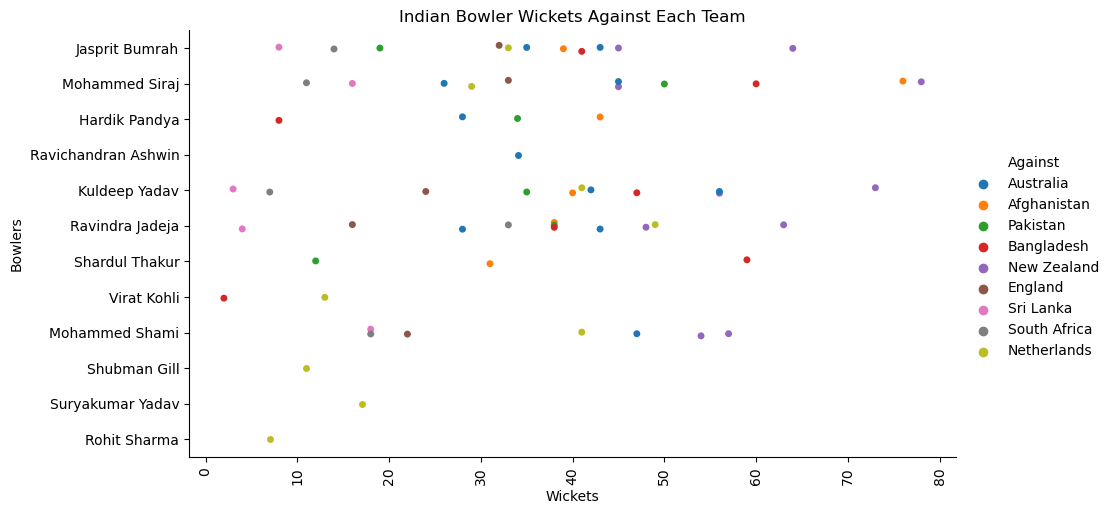

In [210]:
#finding out runs conceded by each bowler against each team in the tournament

plt.figure(figsize=(10,10))  # Adjust the size of the entire figure
sns.catplot(data=indbow, y="Bowler", x="R", hue="Against",aspect=2)
plt.xticks(rotation=90)
plt.title("Indian Bowler Wickets Against Each Team")
plt.xlabel("Wickets")
plt.ylabel("Bowlers")
plt.show()


In [193]:
#most wides by a bowler in a team

indbow.groupby("Bowler")[["WD"]].sum().sort_values(by="WD",ascending=False)[0:4]

,WD
Bowler,
Jasprit Bumrah,22
Mohammed Siraj,17
Mohammed Shami,9
Kuldeep Yadav,4


In [192]:
#most no-balls by a bowler in a team

indbow.groupby("Bowler")[["NB"]].sum().sort_values(by="NB",ascending=False)[0:3]

,NB
Bowler,
Ravindra Jadeja,2
Shardul Thakur,1
Hardik Pandya,0


In [236]:
jbumrah = df2[ df2["Bowler"]=="Jasprit Bumrah"]    
mshami = df2[ df2["Bowler"]=="Mohammed Shami"]
mshami

,Bowler,O,M,R,W,Eco,0s,4s,6s,WD,NB,Team,Against
244,Mohammed Shami,10.0,0,54,5,5.40,32,6,1,0,0,India,New Zealand
346,Mohammed Shami,7.0,2,22,4,3.14,33,3,0,2,0,India,England
392,Mohammed Shami,5.0,1,18,5,3.60,22,3,0,0,0,India,Sri Lanka
440,Mohammed Shami,4.0,0,18,2,4.50,16,2,0,1,0,India,South Africa
532,Mohammed Shami,6.0,0,41,0,6.83,15,4,1,1,0,India,Netherlands
547,Mohammed Shami,9.5,0,57,7,5.79,37,3,4,2,0,India,New Zealand
570,Mohammed Shami,7.0,1,47,1,6.71,28,6,1,3,0,India,Australia


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


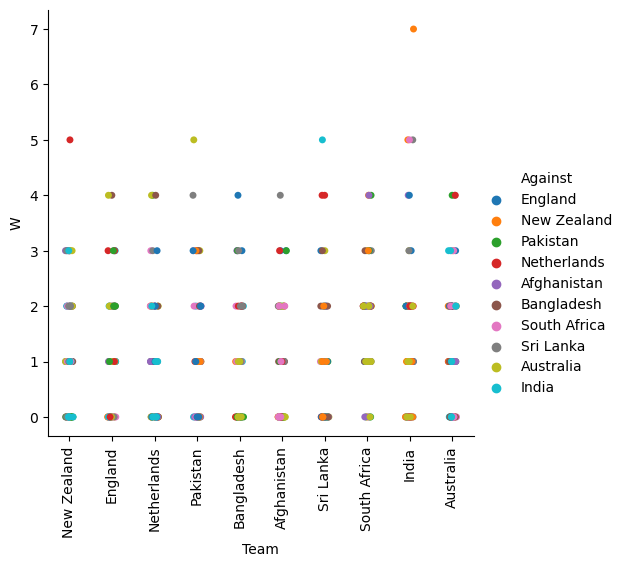

In [249]:
#finding country wise different wicket hauls i.e. 5,6,7 by a single bowler in a match

sns.catplot(data=df2, x="Team", y="W" , hue="Against")
plt.xticks(rotation=90)
plt.show()

In [270]:
#player who took 5 wicket hauls

fivewickethauls = df2[ df2['W']==5 ][['Bowler']].value_counts().reset_index()
fivewickethauls

,Bowler,count
0,Mohammed Shami,2
1,Dilshan Madushanka,1
2,Mitchell Santner,1
3,Ravindra Jadeja,1
4,Shaheen Shah Afridi,1


In [276]:
df2[ df2['W']==5 ][['Bowler','Against']]

,Bowler,Against
70,Mitchell Santner,Netherlands
207,Shaheen Shah Afridi,Australia
244,Mohammed Shami,New Zealand
384,Dilshan Madushanka,India
392,Mohammed Shami,Sri Lanka
439,Ravindra Jadeja,South Africa


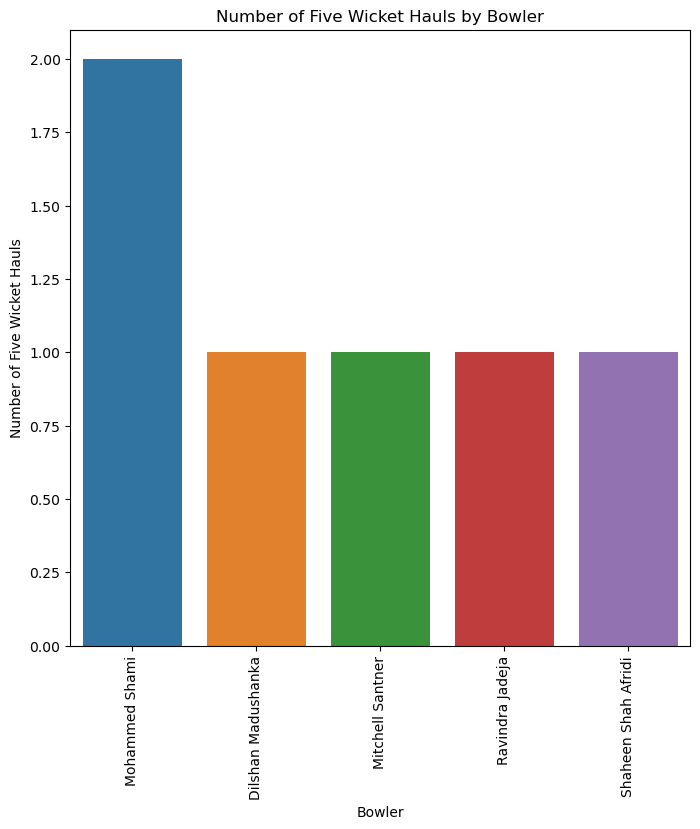

In [268]:
plt.figure(figsize=(8,8))
sns.barplot(data=fivewickethauls,x="Bowler",y="count")
plt.title('Number of Five Wicket Hauls by Bowler')
plt.xlabel('Bowler')
plt.ylabel('Number of Five Wicket Hauls')
plt.xticks(rotation=90)  
plt.show()

In [274]:
#player who took more than 5  wicket hauls

fivewickethauls = df2[ df2['W']>5 ][['Bowler',"Against"]]
fivewickethauls

,Bowler,Against
547,Mohammed Shami,New Zealand


In [313]:
four_sixes = df2.groupby("Bowler")[['O','0s','4s','6s']].sum()

In [314]:
#most 6s conceded by a bowler

four = four_sixes[ four_sixes["O"]>45].sort_values(by="4s",ascending=False)[:11]

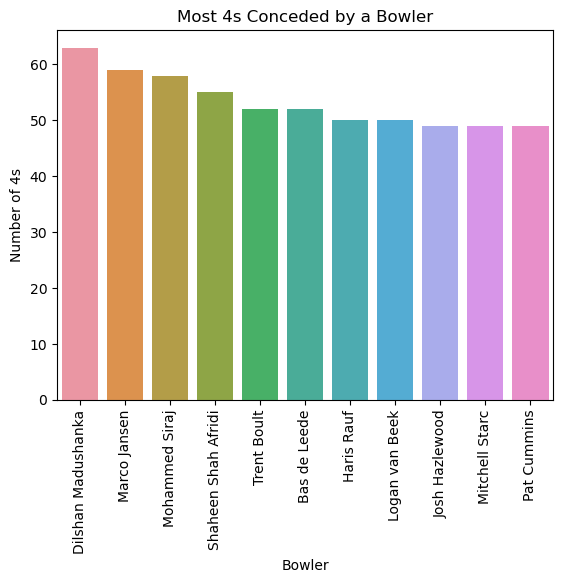

In [315]:
sns.barplot(data=four,x=four.index,y="4s")
plt.title('Most 4s Conceded by a Bowler')
plt.xlabel('Bowler')
plt.ylabel('Number of 4s')
plt.xticks(rotation=90)  
plt.show()

In [316]:
#most 6s conceded by a bowler

six = four_sixes[ four_sixes["O"]>45].sort_values(by="6s",ascending=False)[:11]

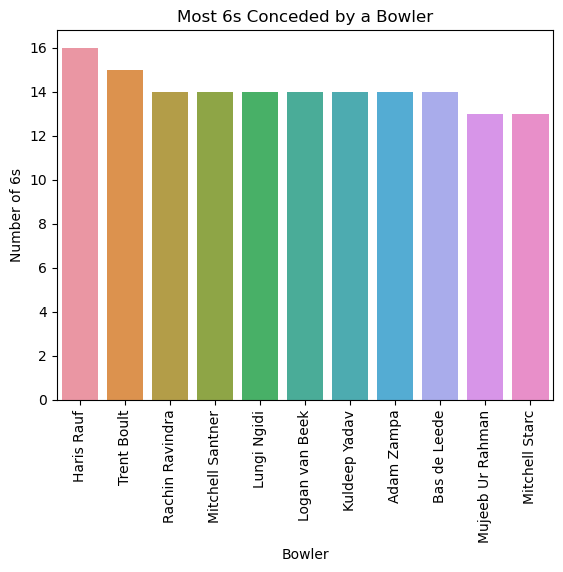

In [317]:
sns.barplot(data=six,x=six.index,y="6s")
plt.title('Most 6s Conceded by a Bowler')
plt.xlabel('Bowler')
plt.ylabel('Number of 6s')
plt.xticks(rotation=90)  
plt.show()

In [318]:
#bowlers who bowled the maximum dot balls

dot_balls = four_sixes[ four_sixes["O"]>45].sort_values(by="0s",ascending=False)[:11]
dot_balls

,O,0s,4s,6s
Bowler,,,,
Jasprit Bumrah,91.5,372,38,6
Josh Hazlewood,93.1,334,49,8
Keshav Maharaj,89.0,321,24,12
Trent Boult,91.0,316,52,15
Ravindra Jadeja,92.9,315,25,9
Kuldeep Yadav,95.1,305,21,14
Mitchell Starc,87.0,287,49,13
Mohammed Siraj,82.3,279,58,8
Mitchell Santner,92.4,276,24,14


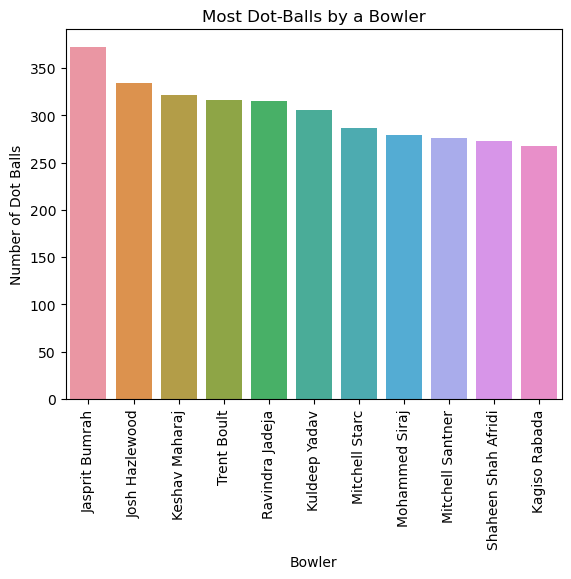

In [322]:
sns.barplot(data=dot_balls,x=dot_balls.index,y="0s")
plt.title('Most Dot-Balls by a Bowler')
plt.xlabel('Bowler')
plt.ylabel('Number of Dot Balls')
plt.xticks(rotation=90)  
plt.show()

In [309]:
#finding a team bowler performace (runs and wicket contribution) in a single match

indvspak = df2[ (df2["Team"]=="India") & (df2["Against"]=="Pakistan") ]
indvspak

,Bowler,O,M,R,W,Eco,0s,4s,6s,WD,NB,Team,Against
135,Jasprit Bumrah,7.0,1,19,2,2.71,33,3,0,1,0,India,Pakistan
136,Mohammed Siraj,8.0,0,50,2,6.25,22,7,0,0,0,India,Pakistan
137,Hardik Pandya,6.0,0,34,2,5.66,20,6,0,0,0,India,Pakistan
138,Kuldeep Yadav,10.0,0,35,2,3.50,38,4,0,0,0,India,Pakistan
139,Ravindra Jadeja,9.5,0,38,2,3.86,35,4,0,0,0,India,Pakistan
140,Shardul Thakur,2.0,0,12,0,6.00,6,2,0,0,0,India,Pakistan


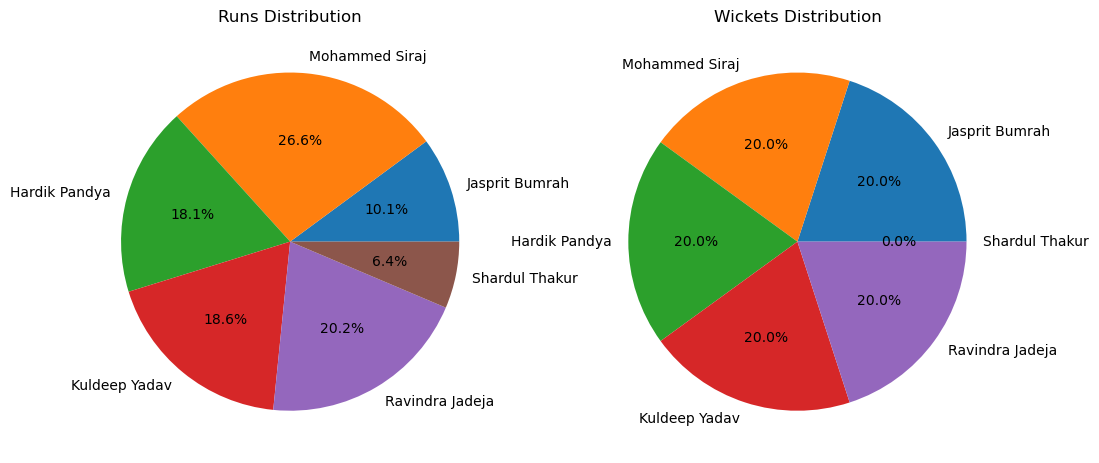

In [311]:
plt.figure(figsize=(12, 6))

ax = plt.subplot(1, 2, 1)
ax.pie(indvspak['R'], labels=indvspak['Bowler'], autopct='%1.1f%%')
ax.set_title('Runs Distribution')

bx = plt.subplot(1, 2, 2)
bx.pie(indvspak['W'], labels=indvspak['Bowler'], autopct='%1.1f%%')
bx.set_title('Wickets Distribution')

plt.show()


# Match Analysis

In [409]:
df3 = pd.read_excel("AllMatch.xlsx")

In [410]:
df3

,Team-1,Team-2,T1-Runs,T1-W,T2-Runs,T2-W,Winner,Man of the match,Won-By,venue,stadium,Date,Time
0,ENG,NZ,282,9,283,1,NZ,Rachin Ravindra,Chasing,Ahmedabad,Narendra Modi Stadium,Oct 05,Afternoon
1,PAK,NED,286,10,205,10,PAK,Saud Shakeel,Defending,Hyderabad,Rajiv Gandhi International Stadium,Oct 06,Afternoon
2,AFG,BAN,156,10,158,4,BAN,Mehidy Hasan Miraz,Chasing,Dharamsala,Himachal Pradesh Cricket Association Stadium,Oct 07,Morning
3,RSA,SL,428,5,326,10,RSA,Aiden Markram,Defending,Delhi,Arun Jaitley Stadium,Oct 07,Afternoon
4,AUS,IND,199,10,201,4,IND,KL Rahul,Chasing,Chennai,MA Chidambaram Stadium,Oct 08,Afternoon
5,NZ,NED,322,7,223,10,NZ,Mitchell Santner,Defending,Hyderabad,Rajiv Gandhi International Stadium,Oct 09,Afternoon
6,ENG,BAN,364,9,227,10,ENG,Dawid Malan,Defending,Dharamsala,Himachal Pradesh Cricket Association Stadium,Oct 10,Morning
7,SL,PAK,344,9,345,4,PAK,Mohammad Rizwan,Chasing,Hyderabad,Rajiv Gandhi International Stadium,Oct 10,Afternoon
8,AFG,IND,272,8,273,2,IND,Rohit Sharma,Chasing,Delhi,Arun Jaitley Stadium,Oct 11,Afternoon
9,RSA,AUS,311,7,177,10,RSA,Quinton de Kock,Defending,Lucknow,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Oct 12,Afternoon


In [411]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Team-1            48 non-null     object
 1   Team-2            48 non-null     object
 2   T1-Runs           48 non-null     int64 
 3   T1-W              48 non-null     int64 
 4   T2-Runs           48 non-null     int64 
 5   T2-W              48 non-null     int64 
 6   Winner            48 non-null     object
 7   Man of the match  48 non-null     object
 8   Won-By            48 non-null     object
 9   venue             48 non-null     object
 10  stadium           48 non-null     object
 11  Date              48 non-null     object
 12  Time              48 non-null     object
dtypes: int64(4), object(9)
memory usage: 5.0+ KB


In [412]:
#finding matches per venue

venues = df3['venue'].value_counts()
venues

venue
Ahmedabad     5
Dharamsala    5
Delhi         5
Chennai       5
Lucknow       5
Pune          5
Bengaluru     5
Mumbai        5
Kolkata       5
Hyderabad     3
Name: count, dtype: int64

In [413]:
#finding matches per stadium

stadiums = df3['stadium'].value_counts()
stadiums

stadium
Narendra Modi Stadium                                           5
Himachal Pradesh Cricket Association Stadium                    5
Arun Jaitley Stadium                                            5
MA Chidambaram Stadium                                          5
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium    5
Maharashtra Cricket Association Stadium                         5
M.Chinnaswamy Stadium                                           5
Wankhede Stadium                                                5
Eden Gardens                                                    5
Rajiv Gandhi International Stadium                              3
Name: count, dtype: int64

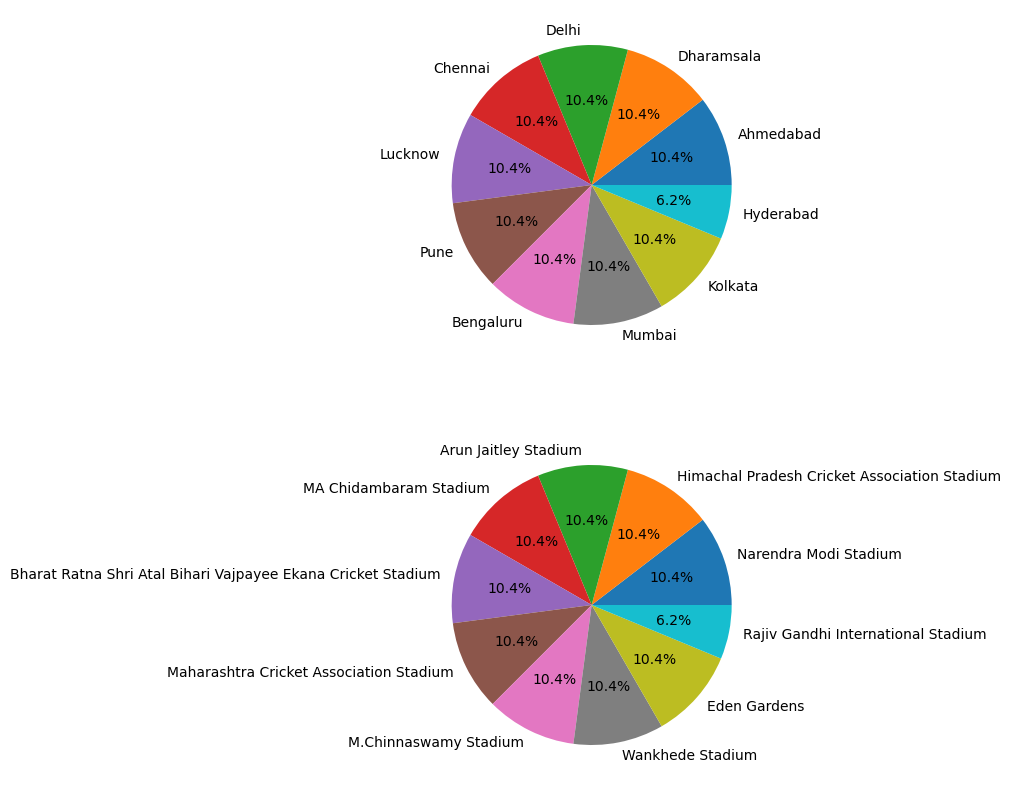

In [414]:
plt.figure(figsize=(10,10))
ax = plt.subplot(2,1,1)
ax.pie(venues, labels=venues.index, autopct='%1.1f%%')

bx= plt.subplot(2,1,2)
bx.pie(stadiums, labels=stadiums.index, autopct='%1.1f%%')
plt.show()

In [415]:
time = df3['Time'].value_counts()
time

Time
Afternoon    42
Morning       6
Name: count, dtype: int64

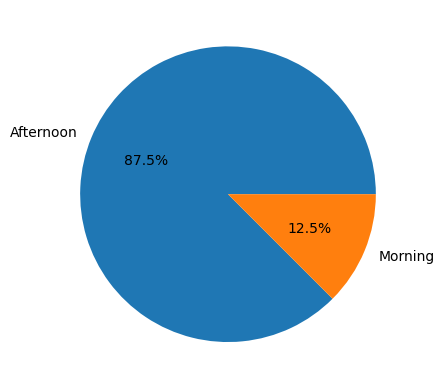

In [416]:
plt.pie(time, labels=time.index, autopct='%1.1f%%')
plt.show()

In [417]:
#finding wins of each team and how (chasing/defending)

won_by = df3.groupby(["Winner","Won-By"])[["Won-By"]].size().reset_index(name="count")
won_by

,Winner,Won-By,count
0,AFG,Chasing,3
1,AFG,Defending,1
2,AUS,Chasing,5
3,AUS,Defending,4
4,BAN,Chasing,2
5,ENG,Defending,3
6,IND,Chasing,5
7,IND,Defending,5
8,NED,Defending,2
9,NZ,Chasing,3


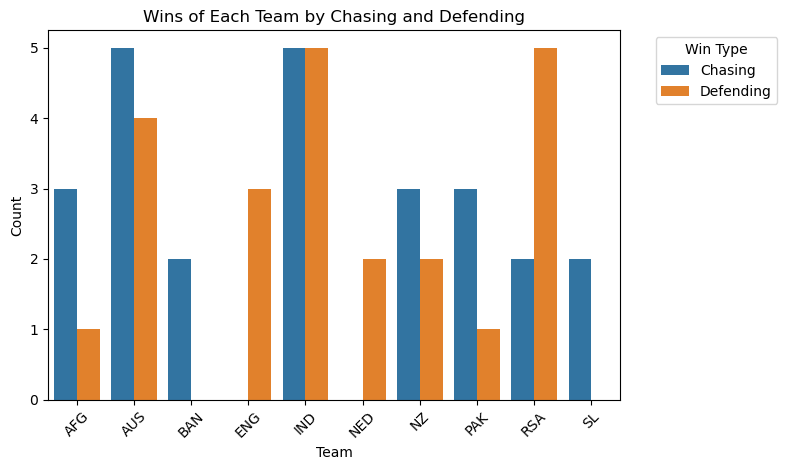

In [418]:
sns.barplot(data=won_by, x="Winner", y="count", hue="Won-By")
plt.title('Wins of Each Team by Chasing and Defending')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.legend(title="Win Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [419]:
#finding players who got most man of the matches

motm = df3['Man of the match'].value_counts()[:5]

In [420]:
motm.reset_index()

,Man of the match,count
0,Mohammed Shami,3
1,Travis Head,3
2,Rohit Sharma,2
3,Glenn Maxwell,2
4,Virat Kohli,2


In [436]:
#total matches won by each team

wins = df3.groupby("Winner")["Winner"].size().sort_values(ascending=False)
wins

Winner
IND    10
AUS     9
RSA     7
NZ      5
AFG     4
PAK     4
ENG     3
BAN     2
NED     2
SL      2
Name: Winner, dtype: int64

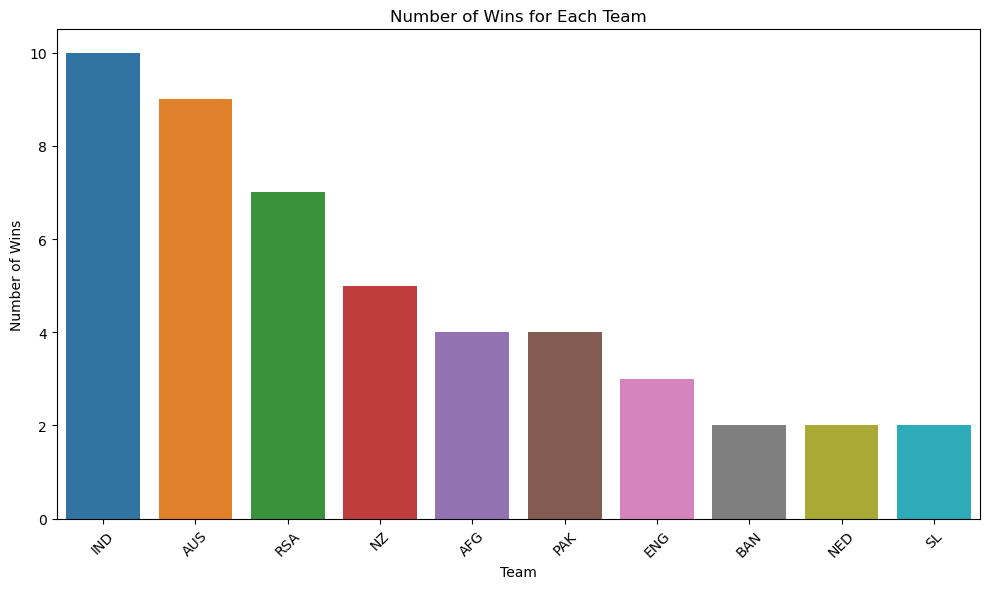

In [438]:
plt.figure(figsize=(10, 6))  
sns.barplot(x=wins.index, y=wins.values)
plt.title('Number of Wins for Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

In [439]:
# finding teams who scored 200 in the first innings and lost

df3[ (df3['T1-Runs']<200) & (df3['Team-1']==df3['Winner'])  ]

,Team-1,Team-2,T1-Runs,T1-W,T2-Runs,T2-W,Winner,Man of the match,Won-By,venue,stadium,Date,Time


**From this we can infer that No team won scoring 200 in the 1st innings**
**<br>200 runs is not enough score for a team to win**

In [448]:
#teams who gave target more than 400

df3[ (df3['T1-Runs']>400)]

,Team-1,Team-2,T1-Runs,T1-W,T2-Runs,T2-W,Winner,Man of the match,Won-By,venue,stadium,Date,Time
3,RSA,SL,428,5,326,10,RSA,Aiden Markram,Defending,Delhi,Arun Jaitley Stadium,Oct 07,Afternoon
34,NZ,PAK,401,6,200,1,PAK,Fakhar Zaman,Chasing,Bengaluru,M.Chinnaswamy Stadium,Nov 04,Morning
44,IND,NED,410,4,250,10,IND,Shreyas Iyer,Defending,Bengaluru,M.Chinnaswamy Stadium,Nov 12,Afternoon


In [443]:
#finding teams who scored 400 in the first innings and lost

df3[ (df3['T1-Runs']>400) & (df3['Team-2']==df3['Winner']) ]

,Team-1,Team-2,T1-Runs,T1-W,T2-Runs,T2-W,Winner,Man of the match,Won-By,venue,stadium,Date,Time
34,NZ,PAK,401,6,200,1,PAK,Fakhar Zaman,Chasing,Bengaluru,M.Chinnaswamy Stadium,Nov 04,Morning


**It only happened ones in the tournamnet that a team lost even after scoring 400**

In [449]:
#teams who scored more than 350 runs in the 1st innings
 
threehundredfifty = df3[ df3['T1-Runs']>350 ][["Team-1","Team-2","T1-Runs"]]
threehundredfifty

,Team-1,Team-2,T1-Runs
3,RSA,SL,428
6,ENG,BAN,364
17,AUS,PAK,367
19,RSA,ENG,399
22,RSA,BAN,382
23,AUS,NED,399
26,AUS,NZ,388
31,RSA,NZ,357
32,IND,SL,357
34,NZ,PAK,401


In [450]:
threehundredfifty['Team-1'].value_counts()

Team-1
RSA    4
AUS    3
IND    3
ENG    1
NZ     1
Name: count, dtype: int64

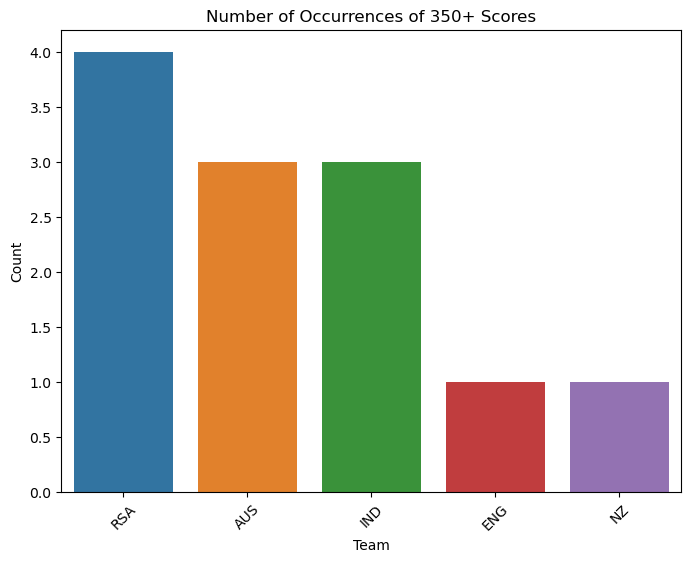

In [459]:
team1_counts = threehundredfifty['Team-1'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(x='Team-1', data=threehundredfifty, order=team1_counts.index)
plt.title('Number of Occurrences of 350+ Scores')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

In [453]:
#matches in which 350+ was scored in both the innings
 
threehfifty = df3[ (df3['T1-Runs']>350) & (df3['T2-Runs']>350) ]
threehfifty

,Team-1,Team-2,T1-Runs,T1-W,T2-Runs,T2-W,Winner,Man of the match,Won-By,venue,stadium,Date,Time
26,AUS,NZ,388,10,383,9,AUS,Travis Head,Defending,Dharamsala,Himachal Pradesh Cricket Association Stadium,Oct 28,Morning


In [470]:
#finding all the match scores of a team

indiadefending = df3[ df3['Team-1'] == "IND"]
indiadefending

,Team-1,Team-2,T1-Runs,T1-W,T2-Runs,T2-W,Winner,Man of the match,Won-By,venue,stadium,Date,Time
28,IND,ENG,229,9,129,10,IND,Rohit Sharma,Defending,Lucknow,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Oct 29,Afternoon
32,IND,SL,357,8,55,10,IND,Mohammed Shami,Defending,Mumbai,Wankhede Stadium,Nov 02,Afternoon
36,IND,RSA,326,5,83,10,IND,Virat Kohli,Defending,Kolkata,Eden Gardens,Nov 05,Afternoon
44,IND,NED,410,4,250,10,IND,Shreyas Iyer,Defending,Bengaluru,M.Chinnaswamy Stadium,Nov 12,Afternoon
45,IND,NZ,397,4,327,10,IND,Mohammed Shami,Defending,Mumbai,Wankhede Stadium,Nov 15,Afternoon
47,IND,AUS,240,10,241,4,AUS,Travis Head,Chasing,Ahmedabad,Narendra Modi Stadium,Nov 19,Afternoon


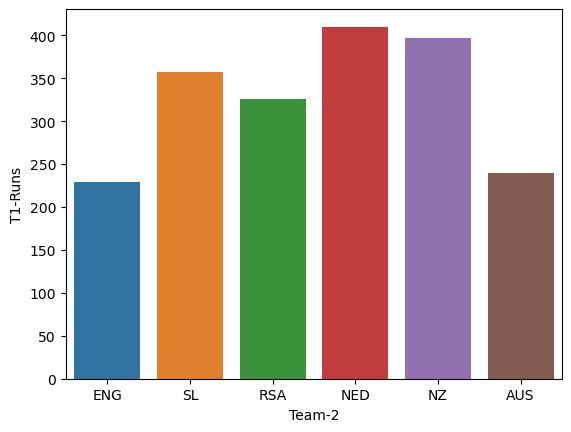

In [474]:
#india scores in 1st innings

sns.barplot(data=indiadefending,x="Team-2",y="T1-Runs")
plt.show()

In [473]:
indiachasing = df3[ df3['Team-2'] == "IND"]
indiachasing

,Team-1,Team-2,T1-Runs,T1-W,T2-Runs,T2-W,Winner,Man of the match,Won-By,venue,stadium,Date,Time
4,AUS,IND,199,10,201,4,IND,KL Rahul,Chasing,Chennai,MA Chidambaram Stadium,Oct 08,Afternoon
8,AFG,IND,272,8,273,2,IND,Rohit Sharma,Chasing,Delhi,Arun Jaitley Stadium,Oct 11,Afternoon
11,PAK,IND,191,10,192,3,IND,Jasprit Bumrah,Chasing,Ahmedabad,Narendra Modi Stadium,Oct 14,Afternoon
16,BAN,IND,256,8,261,3,IND,Virat Kohli,Chasing,Pune,Maharashtra Cricket Association Stadium,Oct 19,Afternoon
20,NZ,IND,273,10,274,6,IND,Mohammed Shami,Chasing,Dharamsala,Himachal Pradesh Cricket Association Stadium,Oct 22,Afternoon


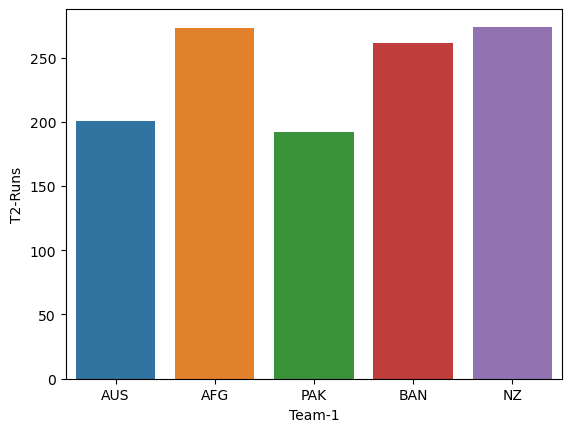

In [478]:
#india scores in 2nd innings

sns.barplot(data=indiachasing,x="Team-1",y="T2-Runs")
plt.show()

In [482]:
#to check team wins

df3[ df3['Winner']=="IND" ]

,Team-1,Team-2,T1-Runs,T1-W,T2-Runs,T2-W,Winner,Man of the match,Won-By,venue,stadium,Date,Time
4,AUS,IND,199,10,201,4,IND,KL Rahul,Chasing,Chennai,MA Chidambaram Stadium,Oct 08,Afternoon
8,AFG,IND,272,8,273,2,IND,Rohit Sharma,Chasing,Delhi,Arun Jaitley Stadium,Oct 11,Afternoon
11,PAK,IND,191,10,192,3,IND,Jasprit Bumrah,Chasing,Ahmedabad,Narendra Modi Stadium,Oct 14,Afternoon
16,BAN,IND,256,8,261,3,IND,Virat Kohli,Chasing,Pune,Maharashtra Cricket Association Stadium,Oct 19,Afternoon
20,NZ,IND,273,10,274,6,IND,Mohammed Shami,Chasing,Dharamsala,Himachal Pradesh Cricket Association Stadium,Oct 22,Afternoon
28,IND,ENG,229,9,129,10,IND,Rohit Sharma,Defending,Lucknow,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Oct 29,Afternoon
32,IND,SL,357,8,55,10,IND,Mohammed Shami,Defending,Mumbai,Wankhede Stadium,Nov 02,Afternoon
36,IND,RSA,326,5,83,10,IND,Virat Kohli,Defending,Kolkata,Eden Gardens,Nov 05,Afternoon
44,IND,NED,410,4,250,10,IND,Shreyas Iyer,Defending,Bengaluru,M.Chinnaswamy Stadium,Nov 12,Afternoon
45,IND,NZ,397,4,327,10,IND,Mohammed Shami,Defending,Mumbai,Wankhede Stadium,Nov 15,Afternoon


In [487]:
#team wickets while they batted first

inn1w = df3.groupby("Team-1")['T1-W'].sum()
inn1w

Team-1
AFG    43
AUS    47
BAN    35
ENG    46
IND    40
NED    38
NZ     29
PAK    37
RSA    38
SL     49
Name: T1-W, dtype: int64

In [489]:
#team wickets while they batted second

inn2w = df3.groupby("Team-2")['T1-W'].sum()
inn2w

Team-2
AFG    33
AUS    50
BAN    44
ENG    36
IND    46
NED    38
NZ     46
PAK    43
RSA    33
SL     33
Name: T1-W, dtype: int64

<Axes: xlabel='Team-1', ylabel='T1-W'>

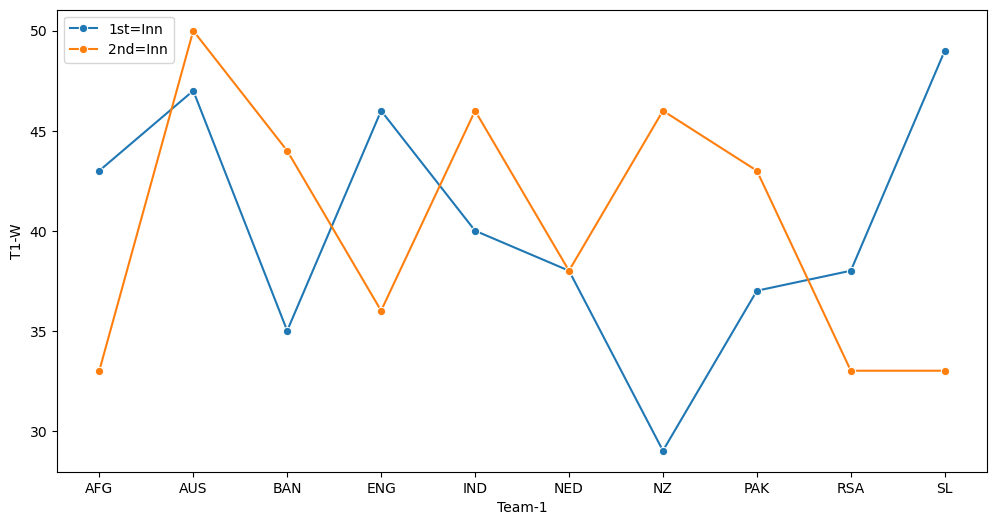

In [496]:
plt.figure(figsize=(12,6))
sns.lineplot(data=inn1w,marker="o",label="1st=Inn")
sns.lineplot(data=inn2w,marker="o",label="2nd=Inn")

In [502]:
#finding team wickets lost in 1st innings in each match
#finding team wickets lost in 2nd innings in each match

india1w = df3[ df3['Team-1']=="IND"]
india2w = df3[ df3['Team-2']=="IND"]

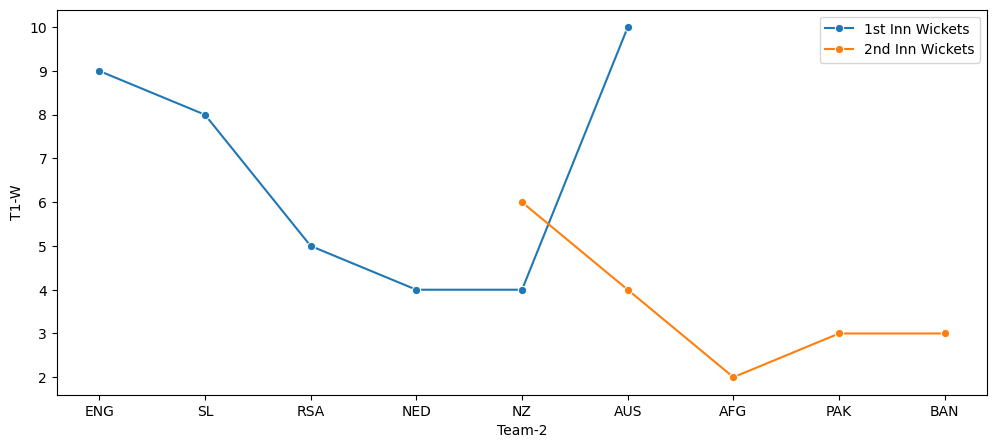

In [508]:
plt.figure(figsize=(12,5))
sns.lineplot(data=india1w,x="Team-2",y="T1-W",marker="o",label="1st Inn Wickets")
sns.lineplot(data=india2w,x="Team-1",y="T2-W",marker="o",label="2nd Inn Wickets")
plt.show()